# Import statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Get data

## load datasets
- download from https://www.kaggle.com/meetnagadia/share-price-of-top-electric-car-company

In [2]:
def loadData(x):
    path = './data/' + x + '.csv'
    x = pd.read_csv(path).set_index('Date')
    return x

In [3]:
bmw = loadData('bmw').iloc[:, :-2]
bmw['High_yesterday'] = bmw['High'].shift(1)
bmw['Low_yesterday'] = bmw['Low'].shift(1)
bmw = bmw.drop(['High','Low'],axis=1).iloc[1:]
bmw

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002
2016-08-26,76.099998,77.230003,76.839996,75.599998
2016-08-29,76.709999,76.879997,77.290001,75.820000
2016-08-30,77.440002,78.459999,77.230003,76.070000
2016-08-31,78.379997,78.010002,78.559998,77.110001
...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000
2021-08-18,80.519997,79.849998,81.199997,80.190002
2021-08-19,77.349998,77.430000,80.519997,78.940002


In [4]:
def fuer(x):
    x = loadData(str(x)).iloc[:, :-2]
    x['High_yesterday'] = x['High'].shift(1)
    x['Low_yesterday'] = x['Low'].shift(1)
    x['Close_yesterday'] = x['Close'].shift(1)
    x = x.drop(['High','Low','Close'],axis=1).iloc[1:]
    return x

In [5]:
Volkswagen = fuer('Volkswagen')
Volkswagen

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,122.050003,123.900002,121.150002,122.650002
2016-08-26,120.699997,122.400002,119.449997,120.400002
2016-08-29,123.199997,124.250000,120.550003,124.199997
2016-08-30,123.250000,124.900002,121.849998,122.400002
2016-08-31,124.400002,125.250000,122.800003,124.800003
...,...,...,...,...
2021-08-17,202.500000,206.199997,202.100006,203.000000
2021-08-18,201.100006,202.649994,200.149994,200.300003
2021-08-19,194.199997,201.300003,195.779999,198.539993


In [6]:
tesla = fuer('tesla')
tesla

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,44.622002,45.430000,44.444000,44.523998
2016-08-26,44.428001,44.759998,44.153999,44.192001
2016-08-29,44.029999,44.571999,43.764000,43.998001
2016-08-30,43.222000,44.080002,43.000000,43.040001
2016-08-31,42.085999,43.222000,42.104000,42.268002
...,...,...,...,...
2021-08-17,672.659973,709.500000,676.400024,686.169983
2021-08-18,669.750000,674.580017,648.840027,665.710022
2021-08-19,678.210022,695.770020,669.349976,688.989990


In [7]:
nissan = fuer('nissan')
nissan

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,976.000000,973.799988,955.299988,972.200012
2016-08-26,980.000000,993.000000,969.099976,982.500000
2016-08-29,1000.000000,984.900024,972.000000,974.000000
2016-08-30,995.000000,1005.000000,996.400024,1001.000000
2016-08-31,1012.000000,1005.500000,988.200012,1003.000000
...,...,...,...,...
2021-08-18,579.900024,596.000000,579.500000,579.500000
2021-08-19,575.599976,584.099976,574.400024,581.000000
2021-08-20,555.700012,578.099976,565.700012,565.700012


In [8]:
honda = fuer('honda')
honda

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,30.580000,30.770000,30.540001,30.600000
2016-08-26,30.219999,30.660000,30.530001,30.620001
2016-08-29,30.520000,30.420000,29.959999,30.230000
2016-08-30,30.879999,30.719999,30.500000,30.620001
2016-08-31,30.760000,30.980000,30.830000,30.900000
...,...,...,...,...
2021-08-17,32.119999,32.410000,32.099998,32.410000
2021-08-18,31.889999,32.160000,31.590000,31.780001
2021-08-19,31.000000,31.889999,31.530001,31.559999


In [9]:
rolls_royces = loadData('rolls royces').iloc[:, :-2]
rolls_royces['High_yesterday'] = rolls_royces['High'].shift(1)
rolls_royces['Low_yesterday'] = rolls_royces['Low'].shift(1)
rolls_royces['Close_yesterday'] = rolls_royces['Close'].shift(1)
rolls_royces = rolls_royces.drop(['High','Low','Close'],axis=1).iloc[1:]
rolls_royces

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,269.730103,272.475494,268.185913,270.588104
2016-08-26,266.126892,270.244904,264.189392,265.612091
2016-08-30,266.984802,269.730103,264.411011,269.215393
2016-08-31,263.209991,269.043793,263.209991,263.381500
2016-09-01,263.896301,265.097412,261.494110,264.239502
...,...,...,...,...
2021-08-17,108.800003,110.459999,108.519997,109.699997
2021-08-18,111.360001,111.459999,107.894997,111.459999
2021-08-19,110.000000,113.000000,110.760002,113.000000


## other car companies

In [10]:
import pandas_datareader.data as pdr

### toyota

In [64]:
toyota = pdr.DataReader(name='7203.T',
                        data_source='yahoo',
                        start='2016-08-24',
                        end='2021-08-23')

In [66]:
toyota.to_csv('./data/toyota.csv')

In [10]:
toyota = fuer('toyota')
toyota

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,6100.0,6126.0,6047.0,6120.0
2016-08-26,6000.0,6127.0,6073.0,6116.0
2016-08-29,6106.0,6008.0,5911.0,5911.0
2016-08-30,6150.0,6186.0,6082.0,6147.0
2016-08-31,6300.0,6245.0,6150.0,6186.0
...,...,...,...,...
2021-08-17,9856.0,9901.0,9791.0,9813.0
2021-08-18,9750.0,9862.0,9753.0,9753.0
2021-08-19,9680.0,9786.0,9718.0,9725.0


### porsche: Porsche Automobil Holding SE (PAH3.DE)

In [71]:
porsche = pdr.DataReader(name='PAH3.DE',
                         data_source='yahoo',
                         start='2016-08-24',
                         end='2021-08-23')

In [73]:
porsche.to_csv('./data/porsche.csv')

In [11]:
porsche = fuer('porsche')
porsche

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,45.200001,45.939999,44.759998,45.349998
2016-08-25,45.000000,45.869999,45.040001,45.369999
2016-08-26,44.349998,45.000000,44.180000,44.290001
2016-08-29,45.099998,45.490002,44.270000,45.380001
2016-08-30,45.299999,45.549999,44.514999,45.009998
...,...,...,...,...
2021-08-17,88.099998,90.419998,88.500000,88.839996
2021-08-18,86.519997,88.440002,86.360001,86.419998
2021-08-19,83.000000,86.580002,83.620003,84.820000


### Daimler: 梅赛德斯奔驰母公司就是戴姆勒，股票代码是DDAIF

In [77]:
Daimler = pdr.DataReader(name='DDAIF',
                         data_source='yahoo',
                         start='2016-08-24',
                         end='2021-08-23')

In [79]:
Daimler.to_csv('./data/Daimler.csv')

In [12]:
Daimler = fuer('Daimler')
Daimler

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,69.970001,70.430000,69.830002,70.000000
2016-08-25,68.540001,70.349998,69.639999,69.639999
2016-08-26,69.699997,69.150002,68.540001,68.669998
2016-08-29,68.080002,70.160004,68.220001,68.660004
2016-08-30,69.239998,68.760002,67.989998,68.739998
...,...,...,...,...
2021-08-17,86.349998,87.949997,87.180000,87.949997
2021-08-18,83.589996,86.349998,84.930000,85.180000
2021-08-19,81.360001,84.370003,83.589996,83.750000


### General_M: 别克--通用汽车股价 General Motors Company (GM)

In [81]:
General_M = pdr.DataReader(name='GM',
                           data_source='yahoo',
                           start='2016-08-24',
                           end='2021-08-23')

In [83]:
General_M.to_csv('./data/General_M.csv')

In [13]:
General_M = fuer('General_M')
General_M

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,31.840000,32.049999,31.870001,31.900000
2016-08-25,31.709999,32.090000,31.760000,31.780001
2016-08-26,31.670000,31.750000,31.360001,31.540001
2016-08-29,31.780001,31.820000,31.420000,31.530001
2016-08-30,31.809999,31.959999,31.570000,31.809999
...,...,...,...,...
2021-08-17,51.980000,53.259998,52.490002,52.950001
2021-08-18,50.529999,52.080002,50.200001,50.470001
2021-08-19,50.000000,51.490002,50.400002,50.840000


### ford: Ford Motor Company (F)

In [88]:
ford = pdr.DataReader(name='F',
                      data_source='yahoo',
                      start='2016-08-24',
                      end='2021-08-23')

In [90]:
ford.to_csv('./data/ford.csv')

In [14]:
ford = fuer('ford')
ford

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,12.41,12.43,12.33,12.42
2016-08-25,12.30,12.44,12.28,12.30
2016-08-26,12.47,12.52,12.21,12.47
2016-08-29,12.38,12.55,12.34,12.38
2016-08-30,12.47,12.50,12.38,12.47
...,...,...,...,...
2021-08-17,13.32,13.56,13.32,13.46
2021-08-18,12.95,13.33,12.81,12.99
2021-08-19,12.80,13.21,12.90,13.00


### peugeot: Peugeot Invest Société anonyme (PEUG.PA)

In [96]:
peugeot = pdr.DataReader(name='PEUG.PA',data_source='yahoo',start='2016-08-24',end='2021-08-23')

In [99]:
peugeot.to_csv('./data/peugeot.csv')

In [15]:
peugeot = fuer('peugeot')
peugeot

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,70.250000,70.190002,69.300003,70.000000
2016-08-25,70.000000,70.250000,69.099998,70.000000
2016-08-26,69.400002,70.220001,69.010002,69.400002
2016-08-29,69.080002,69.940002,69.279999,69.940002
2016-08-30,69.389999,69.930000,68.949997,69.400002
...,...,...,...,...
2021-08-17,117.000000,118.400002,115.800003,116.199997
2021-08-18,116.000000,117.000000,115.000000,116.199997
2021-08-19,116.000000,116.800003,115.000000,116.800003


### STLA: 玛莎拉蒂母公司 Fiat Chrysler Automobiles（菲亚特克莱斯勒汽车）
这个公司居然改名了 Stellantis N.V.

In [104]:
STLA = pdr.DataReader(name='STLA',data_source='yahoo',start='2016-08-24',end='2021-08-23')

In [106]:
STLA.to_csv('./data/STLA.csv')

In [16]:
STLA = fuer('STLA')
STLA

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,6.870000,6.860000,6.730000,6.840000
2016-08-25,6.920000,6.950000,6.860000,6.870000
2016-08-26,6.920000,6.940000,6.860000,6.920000
2016-08-29,6.770000,6.990000,6.810000,6.880000
2016-08-30,6.890000,6.850000,6.750000,6.840000
...,...,...,...,...
2021-08-17,21.080000,21.690001,21.500000,21.680000
2021-08-18,20.930000,21.160000,20.639999,20.840000
2021-08-19,20.420000,21.090000,20.870001,20.870001


## SP500，CSI300和美元指数
方法参见：https://zhuanlan.zhihu.com/p/146726815

### SP500

In [12]:
import pandas_datareader.data as pdr
sp500 = pdr.DataReader(name='^GSPC',
                       data_source='yahoo',
                       start='2016-08-24',
                       end='2021-08-23')
sp500.to_csv('./data/sp500.csv')

In [17]:
sp500 = fuer('sp500')
sp500

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,2185.090088,2193.419922,2186.800049,2186.899902
2016-08-25,2173.290039,2186.659912,2171.250000,2175.439941
2016-08-26,2175.100098,2179.000000,2169.739990,2172.469971
2016-08-29,2170.189941,2187.939941,2160.389893,2169.040039
2016-08-30,2179.449951,2183.479980,2170.189941,2180.379883
...,...,...,...,...
2021-08-17,4462.120117,4473.259766,4437.660156,4472.939941
2021-08-18,4440.939941,4462.120117,4417.830078,4448.080078
2021-08-19,4382.439941,4454.319824,4397.589844,4400.270020


### US Dollar/USDX - Index - Cash (DX-Y.NYB)
NYBOT - NYBOT 即時價格。貨幣為 USD。

In [49]:
USDX = pdr.DataReader(name='DX-Y.NYB',data_source='yahoo',start='2016-08-24',end='2021-08-23')

In [51]:
USDX.to_csv('./data/USDX.csv')

In [18]:
USDX = fuer('USDX')
USDX

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-24,94.550003,94.580002,94.209999,94.540001
2016-08-25,94.779999,94.910004,94.510002,94.790001
2016-08-26,94.709999,94.830002,94.589996,94.769997
2016-08-29,95.459999,95.589996,94.250000,95.570000
2016-08-30,95.570000,95.830002,95.459999,95.580002
...,...,...,...,...
2021-08-17,92.620003,92.660004,92.480003,92.629997
2021-08-18,93.139999,93.169998,92.610001,93.129997
2021-08-19,93.139999,93.260002,92.959999,93.139999


### CSI300

In [84]:
import tushare as ts

CSI300 = ts.get_k_data('hs300', start='2016-08-24',
                       end='2021-08-23').reset_index(drop=True)
CSI300

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0,hs300
1,2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0,hs300
2,2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0,hs300
3,2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0,hs300
4,2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0,hs300
...,...,...,...,...,...,...,...
1211,2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0,hs300
1212,2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0,hs300
1213,2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0,hs300
1214,2021-08-20,4817.49,4769.27,4835.15,4720.83,177635810.0,hs300


In [85]:
CSI300 = CSI300.iloc[:, :-1]
for name in CSI300.columns:
    CSI300 = CSI300.rename(columns={name: name.title()})

In [86]:
csi300 = CSI300.copy().set_index('Date')
csi300

,Open,Close,High,Low,Volume
Date,,,,,
2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0
2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0
2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0
2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0
2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0
...,...,...,...,...,...
2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0
2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0
2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0


In [87]:
csi300.to_csv('./data/CSI300.csv')

In [19]:
CSI300 = loadData('CSI300').iloc[:, :-1]
CSI300['High_yesterday'] = CSI300['High'].shift(1)
CSI300['Low_yesterday'] = CSI300['Low'].shift(1)
CSI300['Close_yesterday'] = CSI300['Close'].shift(1)
CSI300 = CSI300.drop(['High','Low','Close'],axis=1).iloc[1:]
CSI300

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2016-08-25,3314.08,3348.13,3323.73,3329.86
2016-08-26,3312.50,3315.08,3279.81,3308.97
2016-08-29,3306.57,3328.95,3301.74,3307.09
2016-08-30,3310.32,3315.08,3297.07,3307.78
2016-08-31,3310.57,3325.12,3304.60,3311.99
...,...,...,...,...
2021-08-17,4935.00,4973.38,4931.37,4941.07
2021-08-18,4838.47,4967.56,4823.39,4837.40
2021-08-19,4886.56,4909.54,4818.90,4894.24


# Preparation

In [20]:
# Column Name Change
def name_change(df, df_name):
    for name in df.columns:
        df = df.rename(columns={name: (df_name + "_" + name)})
    return df

In [21]:
Volkswagen = name_change(Volkswagen, "Volkswagen")
bmw = name_change(bmw, "bmw")
tesla = name_change(tesla, "tesla")
nissan = name_change(nissan, "nissan")
honda = name_change(honda, "honda")
sp500 = name_change(sp500, "SP500")
CSI300 = name_change(CSI300, "CSI300")
rolls_royces = name_change(rolls_royces, "rolls_royces")
USDX = name_change(USDX, "USDX")
toyota = name_change(toyota, "toyota")
porsche = name_change(porsche, "porsche")
Daimler = name_change(Daimler, "Daimler")
General_M = name_change(General_M, "General_M")
ford = name_change(ford, "ford")
peugeot = name_change(peugeot, "peugeot")
STLA = name_change(STLA, "STLA")

In [22]:
def mergeData(datas):
    total_d = pd.DataFrame()
    for data in datas:
        if total_d.shape[0] == 0:
            total_d = data
        else:
            total_d = total_d.join(data)
    return total_d

In [23]:
DATA = mergeData([bmw, Volkswagen, tesla, nissan, honda, rolls_royces,toyota, porsche,Daimler,General_M,ford,peugeot,STLA,sp500, CSI300,USDX])
DATA

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,Volkswagen_Close_yesterday,tesla_Open,tesla_High_yesterday,...,SP500_Low_yesterday,SP500_Close_yesterday,CSI300_Open,CSI300_High_yesterday,CSI300_Low_yesterday,CSI300_Close_yesterday,USDX_Open,USDX_High_yesterday,USDX_Low_yesterday,USDX_Close_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002,122.050003,123.900002,121.150002,122.650002,44.622002,45.430000,...,2171.250000,2175.439941,3314.08,3348.13,3323.73,3329.86,94.779999,94.910004,94.510002,94.790001
2016-08-26,76.099998,77.230003,76.839996,75.599998,120.699997,122.400002,119.449997,120.400002,44.428001,44.759998,...,2169.739990,2172.469971,3312.50,3315.08,3279.81,3308.97,94.709999,94.830002,94.589996,94.769997
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,124.250000,120.550003,124.199997,44.029999,44.571999,...,2160.389893,2169.040039,3306.57,3328.95,3301.74,3307.09,95.459999,95.589996,94.250000,95.570000
2016-08-30,77.440002,78.459999,77.230003,76.070000,123.250000,124.900002,121.849998,122.400002,43.222000,44.080002,...,2170.189941,2180.379883,3310.32,3315.08,3297.07,3307.78,95.570000,95.830002,95.459999,95.580002
2016-08-31,78.379997,78.010002,78.559998,77.110001,124.400002,125.250000,122.800003,124.800003,42.085999,43.222000,...,2170.409912,2176.120117,3310.57,3325.12,3304.60,3311.99,96.010002,96.139999,95.529999,96.050003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000,202.500000,206.199997,202.100006,203.000000,672.659973,709.500000,...,4437.660156,4472.939941,4935.00,4973.38,4931.37,4941.07,92.620003,92.660004,92.480003,92.629997
2021-08-18,80.519997,79.849998,81.199997,80.190002,201.100006,202.649994,200.149994,200.300003,669.750000,674.580017,...,4417.830078,4448.080078,4838.47,4967.56,4823.39,4837.40,93.139999,93.169998,92.610001,93.129997
2021-08-19,77.349998,77.430000,80.519997,78.940002,194.199997,201.300003,195.779999,198.539993,678.210022,695.770020,...,4397.589844,4400.270020,4886.56,4909.54,4818.90,4894.24,93.139999,93.260002,92.959999,93.139999


## Find the better way to fill NaN

In [24]:
DATA[DATA.isna().any(axis=1)]

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,Volkswagen_Close_yesterday,tesla_Open,tesla_High_yesterday,...,SP500_Low_yesterday,SP500_Close_yesterday,CSI300_Open,CSI300_High_yesterday,CSI300_Low_yesterday,CSI300_Close_yesterday,USDX_Open,USDX_High_yesterday,USDX_Low_yesterday,USDX_Close_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,124.250000,120.550003,124.199997,44.029999,44.571999,...,2160.389893,2169.040039,3306.57,3328.95,3301.74,3307.09,95.459999,95.589996,94.250000,95.570000
2016-09-05,78.970001,78.239998,78.769997,76.660004,124.699997,125.550003,121.849998,125.150002,NaN,NaN,...,NaN,NaN,3321.01,3320.43,3295.76,3314.11,NaN,NaN,NaN,NaN
2016-09-15,74.910004,75.300003,75.769997,74.610001,122.099998,123.400002,121.099998,122.550003,39.298000,39.584000,...,2119.899902,2125.770020,NaN,NaN,NaN,NaN,95.339996,95.660004,95.199997,95.330002
2016-09-16,75.250000,73.419998,75.669998,74.139999,121.849998,123.650002,120.900002,122.400002,40.084000,40.504002,...,2122.360107,2147.260010,NaN,NaN,NaN,NaN,95.230003,95.559998,95.080002,95.290001
2016-09-19,74.050003,73.970001,75.500000,73.220001,119.500000,122.650002,117.800003,117.949997,41.400002,41.139999,...,2131.199951,2139.159912,3242.74,3255.00,3231.34,3238.73,96.040001,96.110001,95.220001,96.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,94.750000,94.790001,94.839996,92.709999,234.000000,234.199997,228.949997,233.300003,612.229980,612.559998,...,4232.250000,4247.439941,NaN,NaN,NaN,NaN,90.510002,90.610001,89.959999,90.559998
2021-07-05,89.820000,89.400002,91.150002,89.750000,211.649994,213.300003,210.850006,211.350006,NaN,NaN,...,NaN,NaN,5073.78,5186.66,5074.36,5081.12,NaN,NaN,NaN,NaN
2021-07-22,84.779999,83.760002,85.180000,81.940002,212.000000,212.500000,202.500000,210.100006,656.440002,664.859985,...,4331.129883,4358.689941,5150.39,5160.54,5122.30,5144.04,92.800003,93.190002,92.730003,92.750000


### Take 10 columns randomly to measure different methods

In [25]:
cols = DATA.sample(n=10, frac=None, replace=False, weights=None, random_state=42, axis=1).columns
errdf = pd.DataFrame(index=[
    'Simple Imputer', 'linear', 'nearest', 'zero', 'slinear', 'quadratic',
    'cubic', 'previous', 'next'],
                     columns=[cols])
errdf

,SP500_Open,CSI300_Low_yesterday,bmw_Open,peugeot_Open,Volkswagen_High_yesterday,General_M_Open,honda_Open,nissan_Open,toyota_High_yesterday,USDX_High_yesterday
Simple Imputer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nearest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quadratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
next,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reference: https://www.machinelearningplus.com/resources/time-series-project-template/

In [26]:
from scipy.interpolate import interp1d


def m_s_e(name):
    df_orig0 = pd.DataFrame(DATA[name].dropna())
    df0 = df_orig0.sample(n=int(df_orig0.shape[0] * 0.8),
                          frac=None,
                          replace=False,
                          weights=None,
                          random_state=41,
                          axis=0).rename(columns={name: 'value'})
    dfdf = mergeData([df_orig0, df0])
    df_orig = pd.DataFrame(dfdf[name]).rename(columns={name: 'value'})
    df = pd.DataFrame(dfdf['value'])

    # Simple Imputer
    df_imput = SimpleImputer().fit_transform(df)
    err_imp = np.round(mean_squared_error(df_orig['value'], df_imput), 2)
    errdf.loc['Simple Imputer', name] = err_imp

    # Interpolation
    parameters = [
        'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
        'previous', 'next'
    ]
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=['value'])
    for param in parameters:
        f = interp1d(df_nona['rownum'], df_nona['value'], kind=param)
        df[param + '_fill'] = f(df['rownum'])
        error = np.round(
            mean_squared_error(df_orig['value'], df[param + '_fill']), 2)
        errdf.loc[param, name] = error
    return errdf


# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [27]:
for name in cols:
    m_s_e(name)
errdf

,SP500_Open,CSI300_Low_yesterday,bmw_Open,peugeot_Open,Volkswagen_High_yesterday,General_M_Open,honda_Open,nissan_Open,toyota_High_yesterday,USDX_High_yesterday
Simple Imputer,65761.46,84853.99,24.85,47.3,133.79,13.66,1.87,15896.75,124560.52,2.44
linear,78.29,157.82,0.19,0.23,1.29,0.08,0.01,17.87,834.39,0.01
nearest,171.48,357.96,0.27,0.5,2.0,0.15,0.03,31.64,1126.39,0.03
zero,197.86,452.41,0.3,0.52,2.29,0.19,0.04,41.75,1821.88,0.05
slinear,78.29,157.82,0.19,0.23,1.29,0.08,0.01,17.87,834.39,0.01
quadratic,93.55,216.84,0.24,0.32,1.35,0.09,0.02,23.34,967.51,0.01
cubic,100.34,234.91,0.25,0.33,1.39,0.09,0.02,24.32,1046.67,0.01
previous,197.86,452.41,0.3,0.52,2.29,0.19,0.04,41.75,1821.88,0.05
next,195.88,354.64,0.39,0.6,2.79,0.19,0.03,32.96,2309.58,0.03


In [28]:
for n in errdf.columns:
    print(errdf[n].astype(float).idxmin())

linear
linear
linear
linear
linear
linear
linear
linear
linear
linear


### So choose 'Linear Interpolation' 

In [29]:
def linear_inter(df, col_name):
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=[col_name])
    f = interp1d(df_nona['rownum'], df_nona[col_name])
    df[col_name] = f(df['rownum'])
    return df

In [30]:
DATA_L = DATA.copy()
DATA_L

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,Volkswagen_Close_yesterday,tesla_Open,tesla_High_yesterday,...,SP500_Low_yesterday,SP500_Close_yesterday,CSI300_Open,CSI300_High_yesterday,CSI300_Low_yesterday,CSI300_Close_yesterday,USDX_Open,USDX_High_yesterday,USDX_Low_yesterday,USDX_Close_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002,122.050003,123.900002,121.150002,122.650002,44.622002,45.430000,...,2171.250000,2175.439941,3314.08,3348.13,3323.73,3329.86,94.779999,94.910004,94.510002,94.790001
2016-08-26,76.099998,77.230003,76.839996,75.599998,120.699997,122.400002,119.449997,120.400002,44.428001,44.759998,...,2169.739990,2172.469971,3312.50,3315.08,3279.81,3308.97,94.709999,94.830002,94.589996,94.769997
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,124.250000,120.550003,124.199997,44.029999,44.571999,...,2160.389893,2169.040039,3306.57,3328.95,3301.74,3307.09,95.459999,95.589996,94.250000,95.570000
2016-08-30,77.440002,78.459999,77.230003,76.070000,123.250000,124.900002,121.849998,122.400002,43.222000,44.080002,...,2170.189941,2180.379883,3310.32,3315.08,3297.07,3307.78,95.570000,95.830002,95.459999,95.580002
2016-08-31,78.379997,78.010002,78.559998,77.110001,124.400002,125.250000,122.800003,124.800003,42.085999,43.222000,...,2170.409912,2176.120117,3310.57,3325.12,3304.60,3311.99,96.010002,96.139999,95.529999,96.050003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000,202.500000,206.199997,202.100006,203.000000,672.659973,709.500000,...,4437.660156,4472.939941,4935.00,4973.38,4931.37,4941.07,92.620003,92.660004,92.480003,92.629997
2021-08-18,80.519997,79.849998,81.199997,80.190002,201.100006,202.649994,200.149994,200.300003,669.750000,674.580017,...,4417.830078,4448.080078,4838.47,4967.56,4823.39,4837.40,93.139999,93.169998,92.610001,93.129997
2021-08-19,77.349998,77.430000,80.519997,78.940002,194.199997,201.300003,195.779999,198.539993,678.210022,695.770020,...,4397.589844,4400.270020,4886.56,4909.54,4818.90,4894.24,93.139999,93.260002,92.959999,93.139999


In [31]:
for col in DATA_L.columns:
    linear_inter(DATA_L, col)

In [32]:
DATA_L = DATA_L.iloc[:, :-1]
DATA_L

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,Volkswagen_Close_yesterday,tesla_Open,tesla_High_yesterday,...,SP500_Low_yesterday,SP500_Close_yesterday,CSI300_Open,CSI300_High_yesterday,CSI300_Low_yesterday,CSI300_Close_yesterday,USDX_Open,USDX_High_yesterday,USDX_Low_yesterday,USDX_Close_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002,122.050003,123.900002,121.150002,122.650002,44.622002,45.430000,...,2171.250000,2175.439941,3314.08,3348.13,3323.73,3329.86,94.779999,94.910004,94.510002,94.790001
2016-08-26,76.099998,77.230003,76.839996,75.599998,120.699997,122.400002,119.449997,120.400002,44.428001,44.759998,...,2169.739990,2172.469971,3312.50,3315.08,3279.81,3308.97,94.709999,94.830002,94.589996,94.769997
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,124.250000,120.550003,124.199997,44.029999,44.571999,...,2160.389893,2169.040039,3306.57,3328.95,3301.74,3307.09,95.459999,95.589996,94.250000,95.570000
2016-08-30,77.440002,78.459999,77.230003,76.070000,123.250000,124.900002,121.849998,122.400002,43.222000,44.080002,...,2170.189941,2180.379883,3310.32,3315.08,3297.07,3307.78,95.570000,95.830002,95.459999,95.580002
2016-08-31,78.379997,78.010002,78.559998,77.110001,124.400002,125.250000,122.800003,124.800003,42.085999,43.222000,...,2170.409912,2176.120117,3310.57,3325.12,3304.60,3311.99,96.010002,96.139999,95.529999,96.050003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000,202.500000,206.199997,202.100006,203.000000,672.659973,709.500000,...,4437.660156,4472.939941,4935.00,4973.38,4931.37,4941.07,92.620003,92.660004,92.480003,92.629997
2021-08-18,80.519997,79.849998,81.199997,80.190002,201.100006,202.649994,200.149994,200.300003,669.750000,674.580017,...,4417.830078,4448.080078,4838.47,4967.56,4823.39,4837.40,93.139999,93.169998,92.610001,93.129997
2021-08-19,77.349998,77.430000,80.519997,78.940002,194.199997,201.300003,195.779999,198.539993,678.210022,695.770020,...,4397.589844,4400.270020,4886.56,4909.54,4818.90,4894.24,93.139999,93.260002,92.959999,93.139999


In [33]:
DATA_L.isna().any()

bmw_Open                  False
bmw_Close                 False
bmw_High_yesterday        False
bmw_Low_yesterday         False
Volkswagen_Open           False
                          ...  
CSI300_Close_yesterday    False
USDX_Open                 False
USDX_High_yesterday       False
USDX_Low_yesterday        False
USDX_Close_yesterday      False
Length: 64, dtype: bool

## Features and Label

In [34]:
x_orig = DATA_L.loc[:, DATA_L.columns != 'bmw_Close']
x_orig

,bmw_Open,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,Volkswagen_Close_yesterday,tesla_Open,tesla_High_yesterday,tesla_Low_yesterday,...,SP500_Low_yesterday,SP500_Close_yesterday,CSI300_Open,CSI300_High_yesterday,CSI300_Low_yesterday,CSI300_Close_yesterday,USDX_Open,USDX_High_yesterday,USDX_Low_yesterday,USDX_Close_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,78.029999,76.690002,122.050003,123.900002,121.150002,122.650002,44.622002,45.430000,44.444000,...,2171.250000,2175.439941,3314.08,3348.13,3323.73,3329.86,94.779999,94.910004,94.510002,94.790001
2016-08-26,76.099998,76.839996,75.599998,120.699997,122.400002,119.449997,120.400002,44.428001,44.759998,44.153999,...,2169.739990,2172.469971,3312.50,3315.08,3279.81,3308.97,94.709999,94.830002,94.589996,94.769997
2016-08-29,76.709999,77.290001,75.820000,123.199997,124.250000,120.550003,124.199997,44.029999,44.571999,43.764000,...,2160.389893,2169.040039,3306.57,3328.95,3301.74,3307.09,95.459999,95.589996,94.250000,95.570000
2016-08-30,77.440002,77.230003,76.070000,123.250000,124.900002,121.849998,122.400002,43.222000,44.080002,43.000000,...,2170.189941,2180.379883,3310.32,3315.08,3297.07,3307.78,95.570000,95.830002,95.459999,95.580002
2016-08-31,78.379997,78.559998,77.110001,124.400002,125.250000,122.800003,124.800003,42.085999,43.222000,42.104000,...,2170.409912,2176.120117,3310.57,3325.12,3304.60,3311.99,96.010002,96.139999,95.529999,96.050003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,82.570000,81.250000,202.500000,206.199997,202.100006,203.000000,672.659973,709.500000,676.400024,...,4437.660156,4472.939941,4935.00,4973.38,4931.37,4941.07,92.620003,92.660004,92.480003,92.629997
2021-08-18,80.519997,81.199997,80.190002,201.100006,202.649994,200.149994,200.300003,669.750000,674.580017,648.840027,...,4417.830078,4448.080078,4838.47,4967.56,4823.39,4837.40,93.139999,93.169998,92.610001,93.129997
2021-08-19,77.349998,80.519997,78.940002,194.199997,201.300003,195.779999,198.539993,678.210022,695.770020,669.349976,...,4397.589844,4400.270020,4886.56,4909.54,4818.90,4894.24,93.139999,93.260002,92.959999,93.139999


In [35]:
x = x_orig.values
x

array([[76.800003  , 78.029999  , 76.690002  , ..., 94.91000366,
        94.51000214, 94.79000092],
       [76.099998  , 76.839996  , 75.599998  , ..., 94.83000183,
        94.58999634, 94.76999664],
       [76.709999  , 77.290001  , 75.82      , ..., 95.58999634,
        94.25      , 95.56999969],
       ...,
       [77.349998  , 80.519997  , 78.940002  , ..., 93.26000214,
        92.95999908, 93.13999939],
       [77.        , 78.449997  , 77.080002  , ..., 93.58000183,
        93.13999939, 93.56999969],
       [78.239998  , 77.089996  , 75.410004  , ..., 93.73000336,
        93.43000031, 93.5       ]])

In [36]:
y = DATA_L.bmw_Close
y

Date
2016-08-25    76.220001
2016-08-26    77.230003
2016-08-29    76.879997
2016-08-30    78.459999
2016-08-31    78.010002
                ...    
2021-08-17    80.349998
2021-08-18    79.849998
2021-08-19    77.430000
2021-08-20    76.980003
2021-08-23    76.800003
Name: bmw_Close, Length: 1265, dtype: float64

## GridSearchCV

In [37]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=5)

### xgboost

In [95]:
xgb_model = xgb.XGBRegressor()
param_grid = {
    'max_depth': [5, 7, 9, 11],
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'alpha': [0.3, 0.5, 0.7],
    'lambda': [0.1, 0.5]
}
g_search = GridSearchCV(xgb_model, param_grid, cv=tscv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=N

In [96]:
g_search.best_params_

{'alpha': 0.5,
 'lambda': 0.5,
 'learning_rate': 0.1,
 'max_depth': 11,
 'n_estimators': 300,
 'subsample': 0.6}

In [97]:
g_search.best_score_

0.6395308326379959

In [38]:
xgb_model = xgb.XGBRegressor(alpha=0.5,
                             reg_lambda=0.5,
                             learning_rate=0.1,
                             max_depth=11,
                             n_estimators=300,
                             subsample=0.6,
                             random_state=12)

### RandomForestRegressor

In [98]:
rf_model = RandomForestRegressor()
rf_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [100, 300, 500, 600]
}
g_search = GridSearchCV(rf_model, rf_param_grid, cv=tscv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 300, 500, 600]})

In [99]:
g_search.best_params_

{'max_depth': 11, 'n_estimators': 500}

In [100]:
g_search.best_score_

0.6010857276591962

In [39]:
rf_model = RandomForestRegressor(max_depth=11,
                                 n_estimators=500,
                                 random_state=12)

### Ridge

In [101]:
RidgeRegr = linear_model.Ridge(random_state=42)
param_grid = {'alpha': [0.01, 0.1, 10]}
g_search = GridSearchCV(RidgeRegr, param_grid)
g_search.fit(x, y)
print(g_search.best_params_)
print(g_search.best_score_)

{'alpha': 0.01}
0.9760513422408984


In [40]:
Ridge_model = linear_model.Ridge(alpha=0.01, random_state=12)

## TimeSeriesSplit

In [41]:
def timeseries_r2(model):
    for train_index, test_index in tscv.split(DATA_L):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        print('len(x_train):', x_train.shape[0], '     r2_score:',
              r2_score(y_test, y_predict, multioutput='uniform_average'))

In [106]:
# xgboost
timeseries_r2(xgb_model)

len(x_train): 215      r2_score: 0.5757791762540134
len(x_train): 425      r2_score: 0.9269646436791007
len(x_train): 635      r2_score: 0.27364576497489934
len(x_train): 845      r2_score: 0.32763730172975514
len(x_train): 1055      r2_score: 0.974943807823047


In [107]:
# RF
timeseries_r2(rf_model)

len(x_train): 215      r2_score: 0.817931866509914
len(x_train): 425      r2_score: 0.8483668087930649
len(x_train): 635      r2_score: 0.03508276437932456
len(x_train): 845      r2_score: 0.29388619913355896
len(x_train): 1055      r2_score: 0.9770580482776934


In [42]:
# Linear Regression
LR = linear_model.LinearRegression()
timeseries_r2(LR)

len(x_train): 215      r2_score: 0.6440629443317363
len(x_train): 425      r2_score: 0.8646870138832463
len(x_train): 635      r2_score: 0.97027286205594
len(x_train): 845      r2_score: 0.9663466133785387
len(x_train): 1055      r2_score: 0.9735213423180565


In [109]:
# Ridge
timeseries_r2(Ridge_model)

len(x_train): 215      r2_score: 0.6554793138331287
len(x_train): 425      r2_score: 0.8650512661156482
len(x_train): 635      r2_score: 0.9702883772788737
len(x_train): 845      r2_score: 0.9663196722472893
len(x_train): 1055      r2_score: 0.9735202053556968


# Predict

In [43]:
x_train, y_train = x[0:1055], y[0:1055]
x_test, y_test = x[1055:], y[1055:]

In [44]:
def result_plot(model, model_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    plt.figure(figsize=(12,6),dpi=300)
    plt.plot(y_predict, label="Estmated BMW_Close")
    plt.plot(y_test, label="Real BMW_Close")
    plt.title(model_name, fontsize=15)
    plt.legend()
    plt.grid()
    plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
               rotation=90)
    plt.ylabel('Close Price', fontsize=14)
    plt.show()
    print('r2_socre:',
          r2_score(y_test, y_predict, multioutput='uniform_average'))
    return y_predict

### XGboost

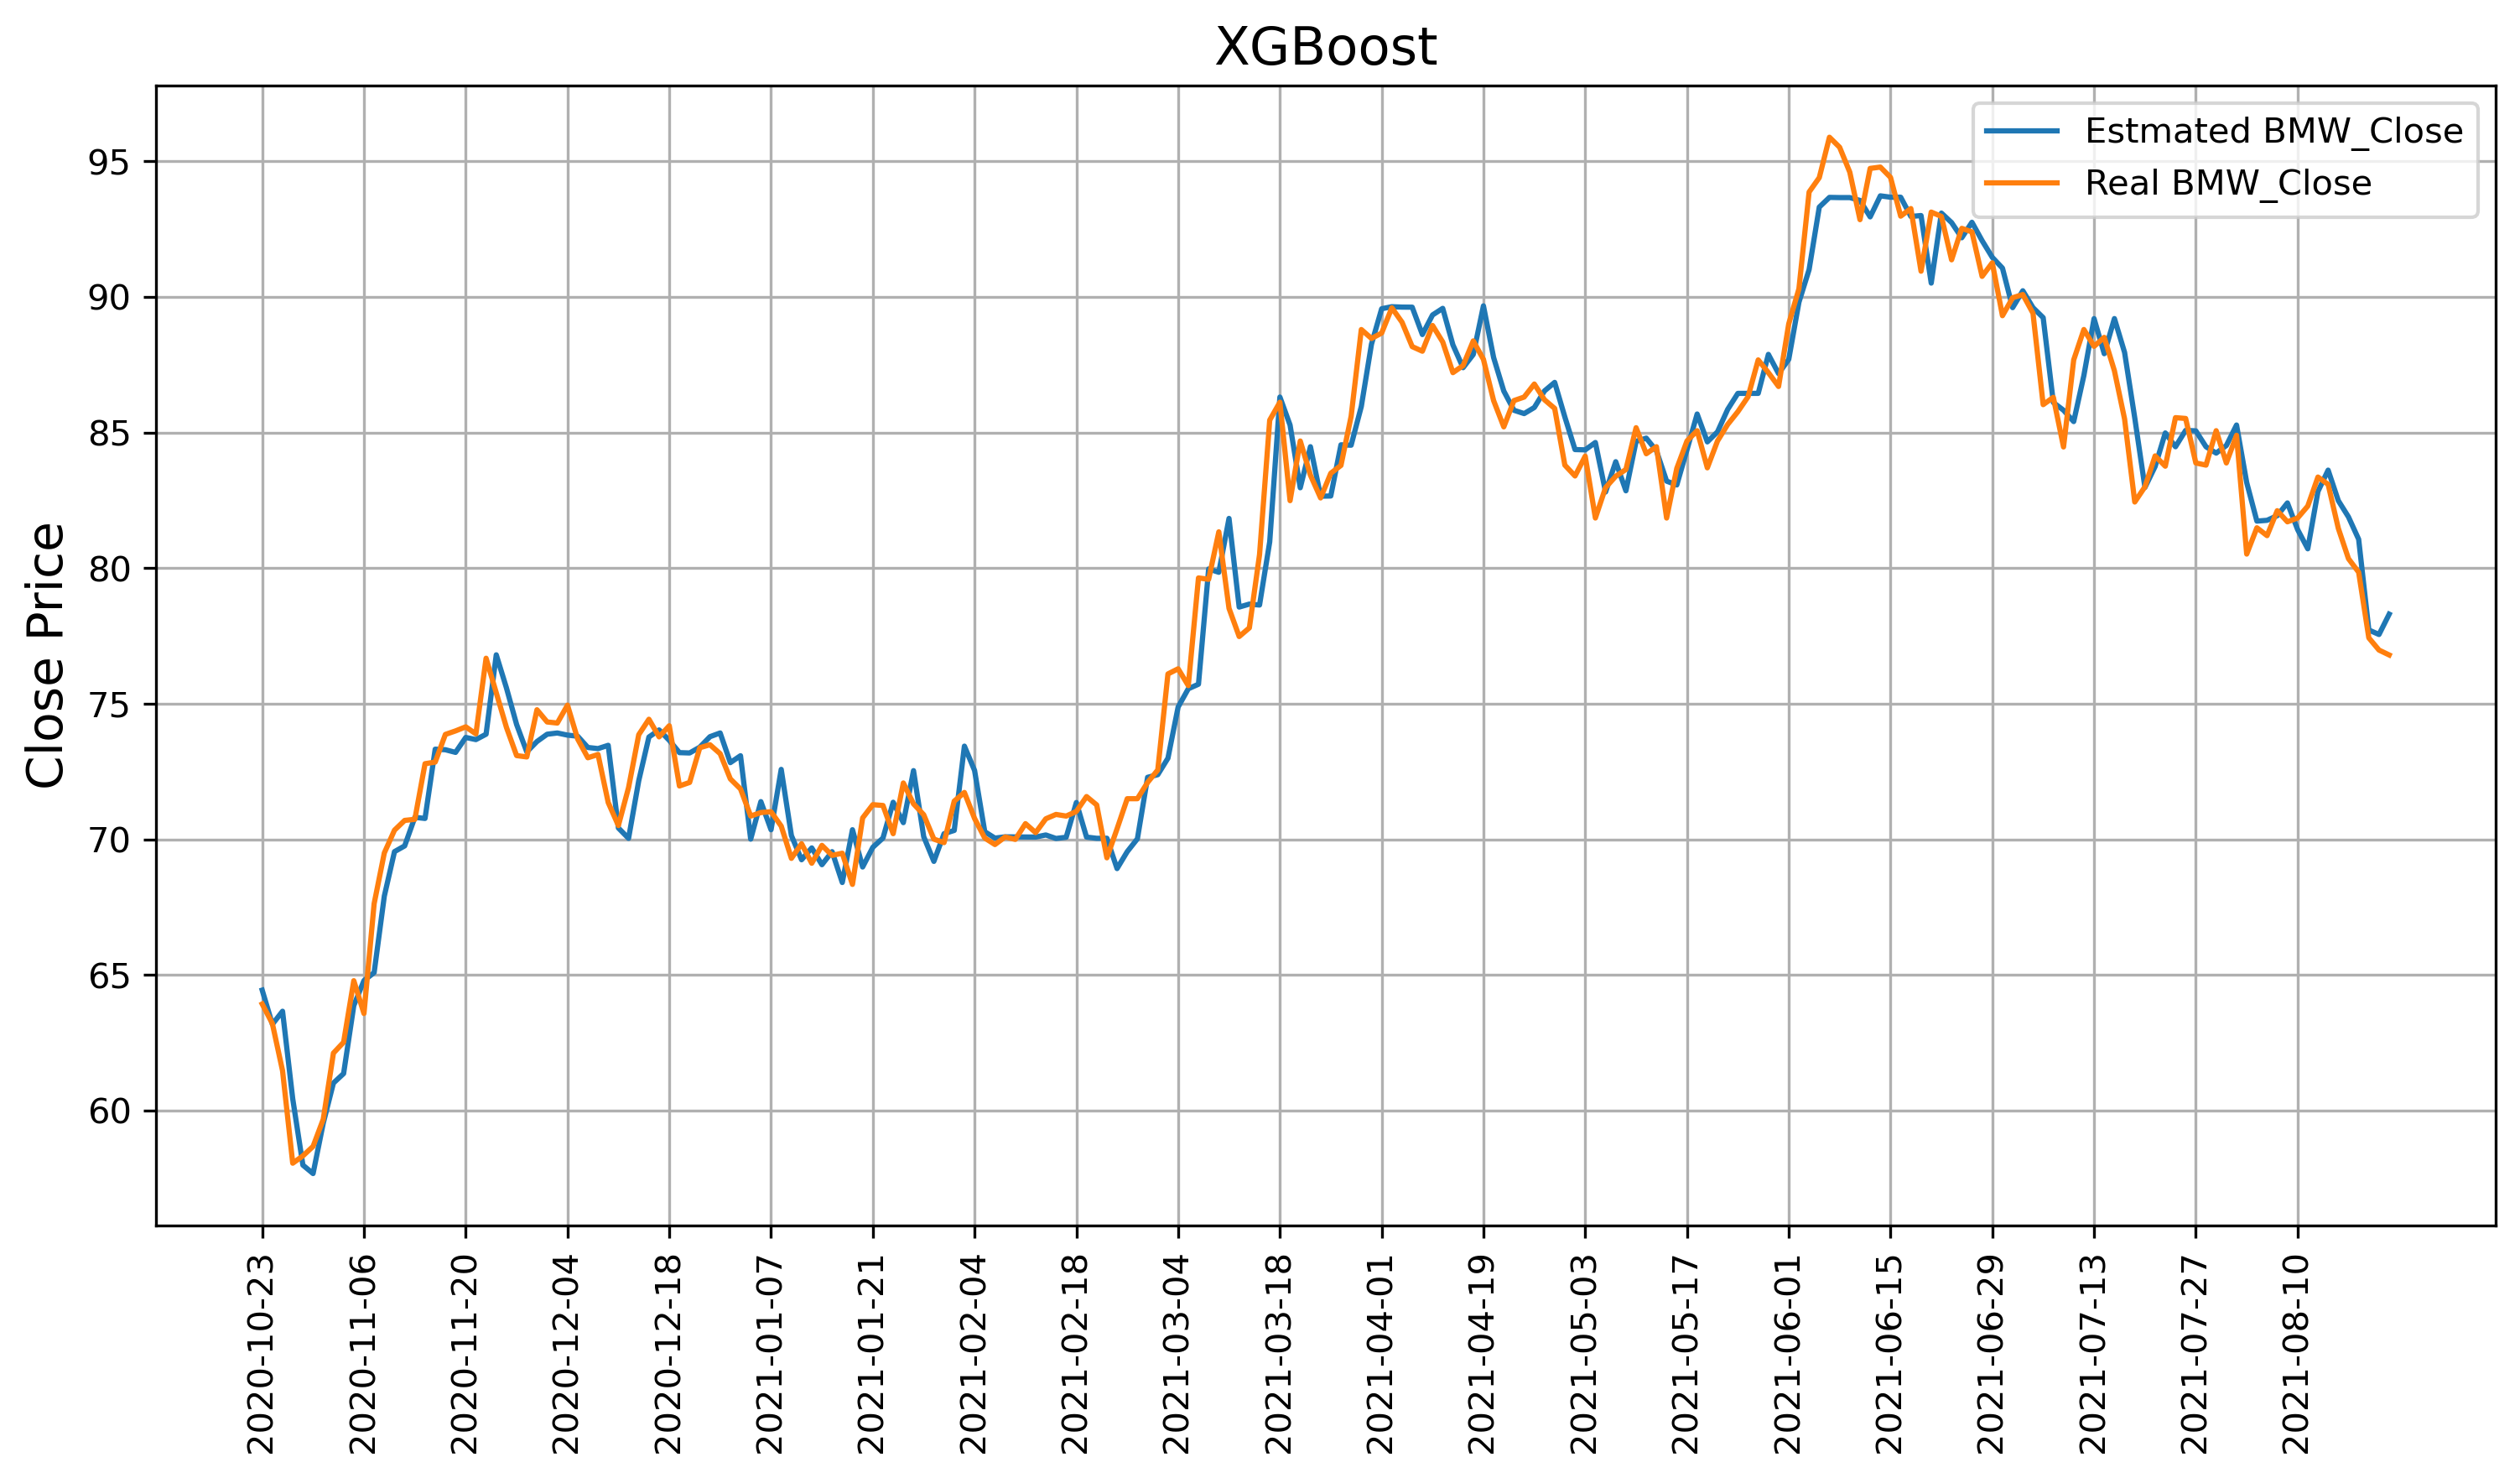

r2_socre: 0.9780169621185048


In [45]:
y_pred_xgb = result_plot(xgb_model, 'XGBoost', x_train, y_train, x_test, y_test)

### RF

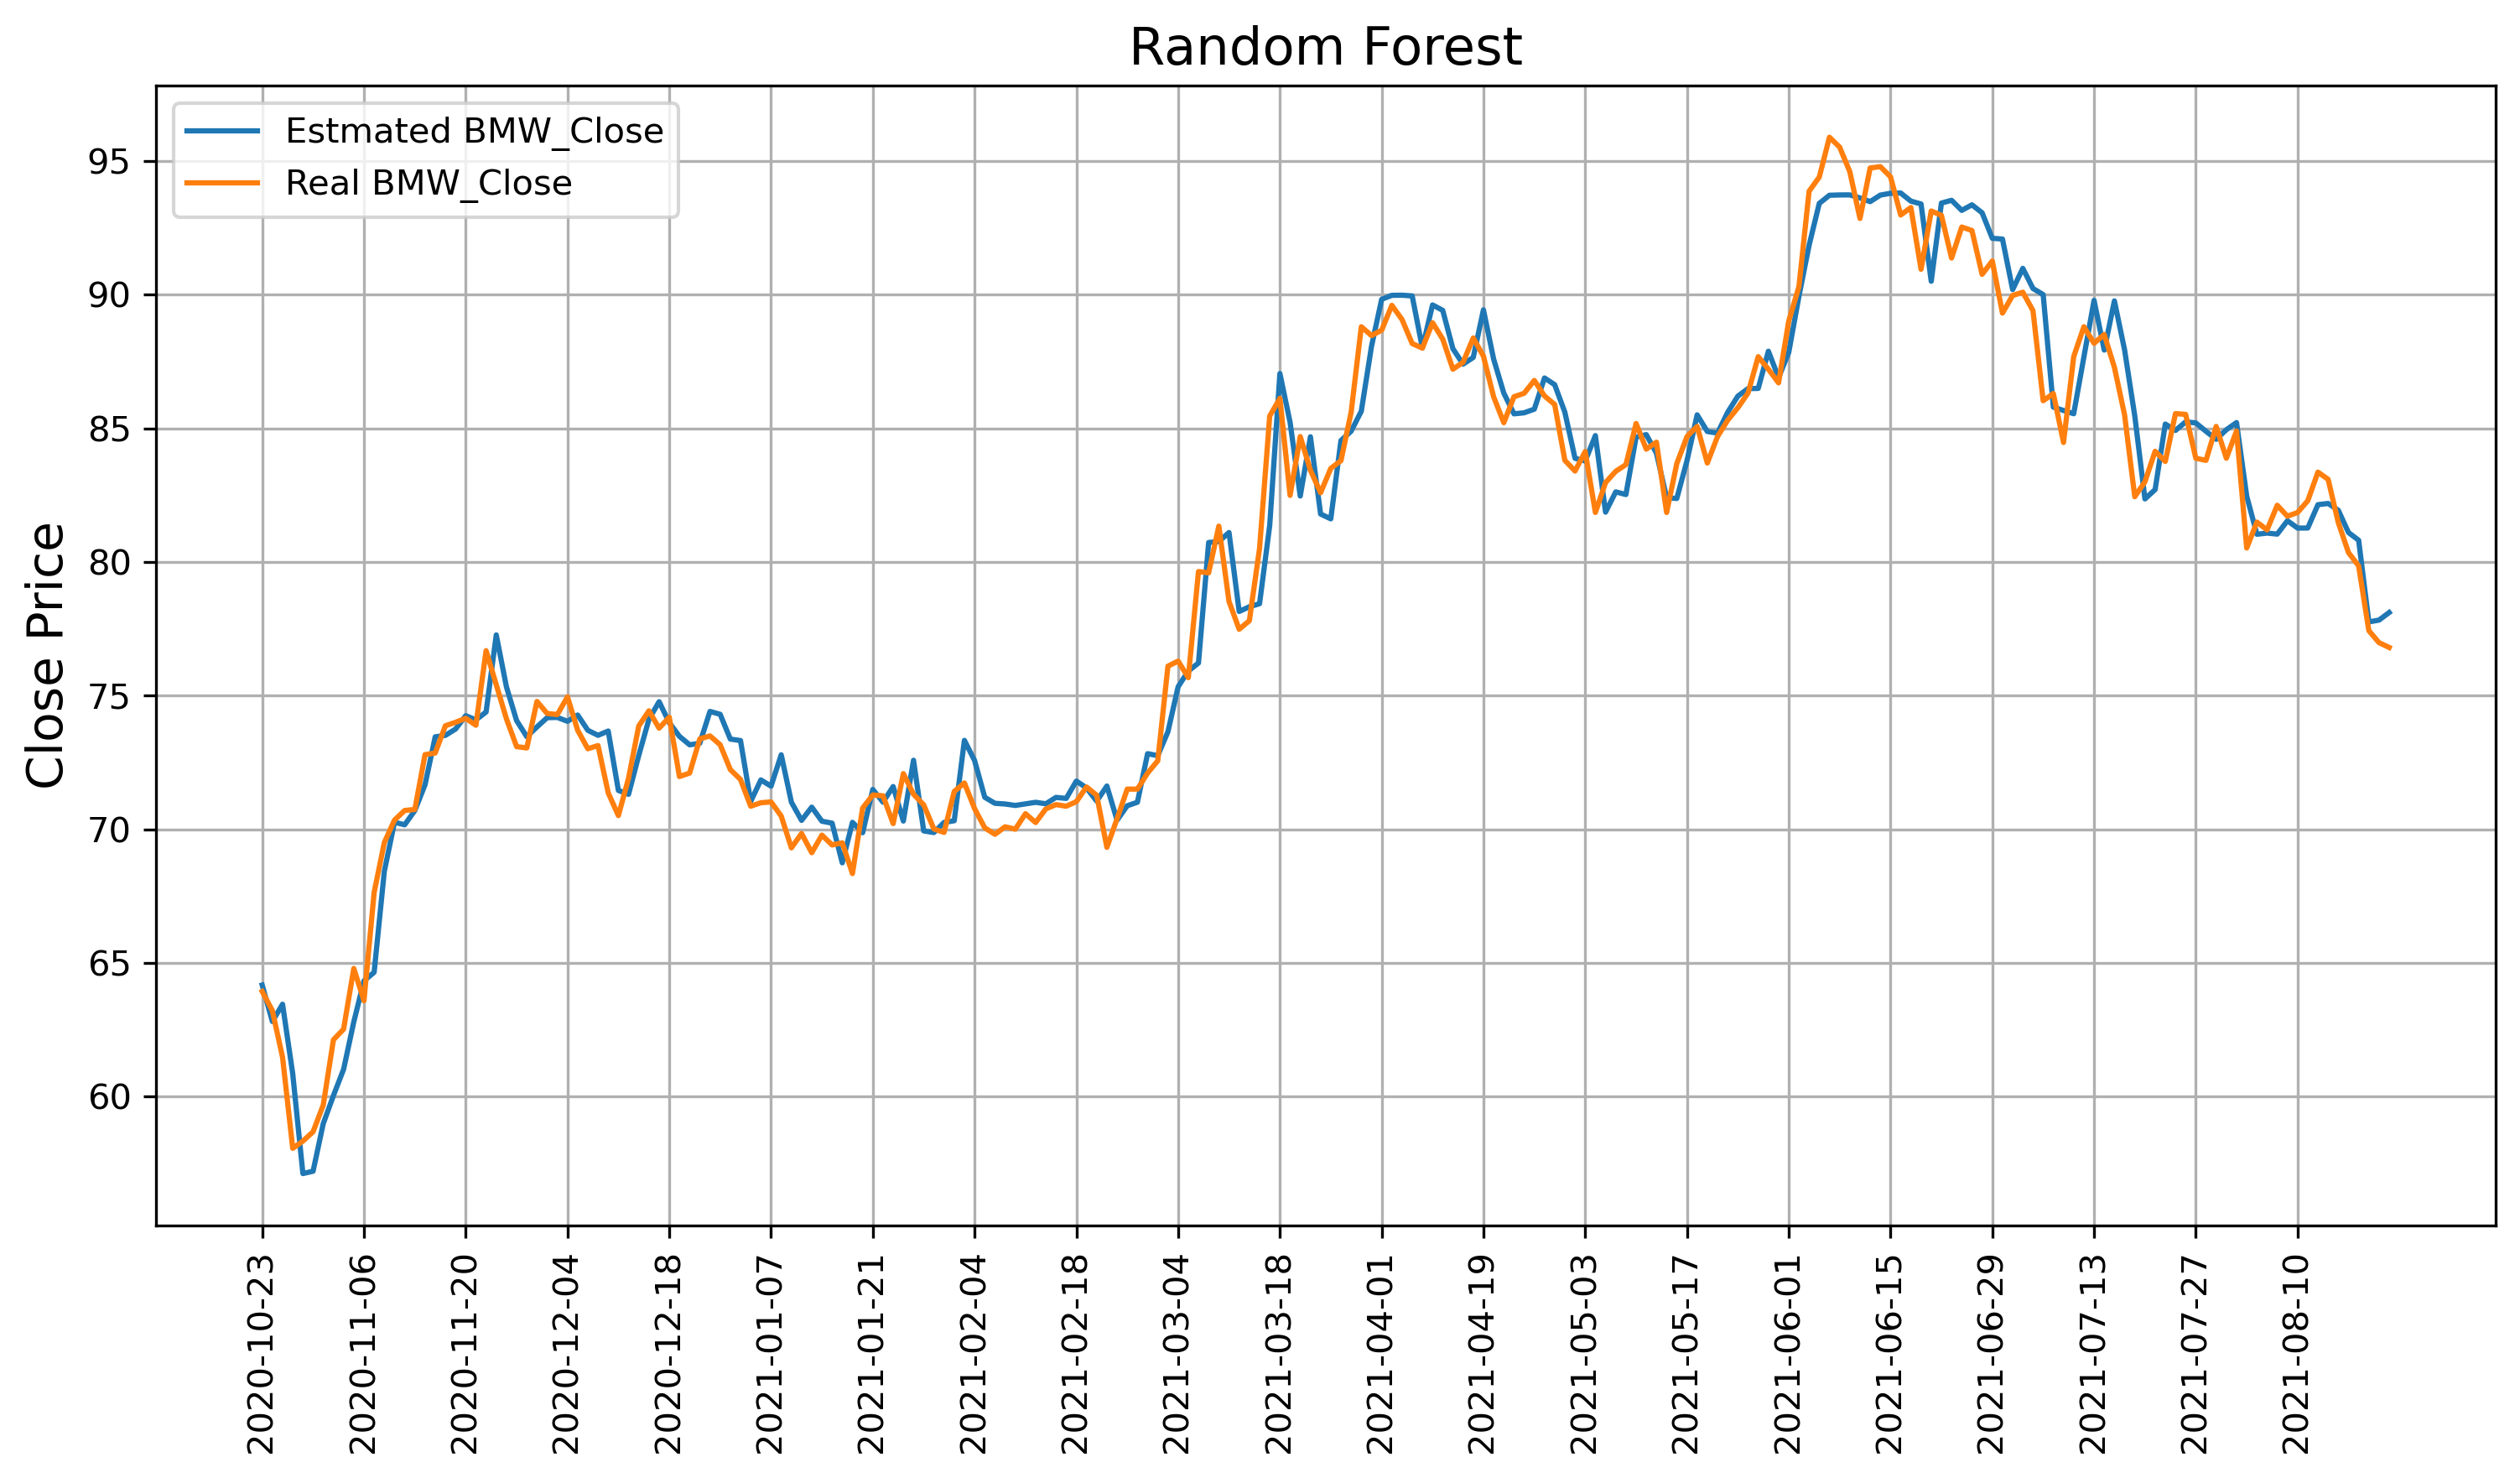

r2_socre: 0.9774273932856392


In [46]:
y_pred_rf = result_plot(rf_model, 'Random Forest', x_train, y_train, x_test, y_test)

### LinearRegression

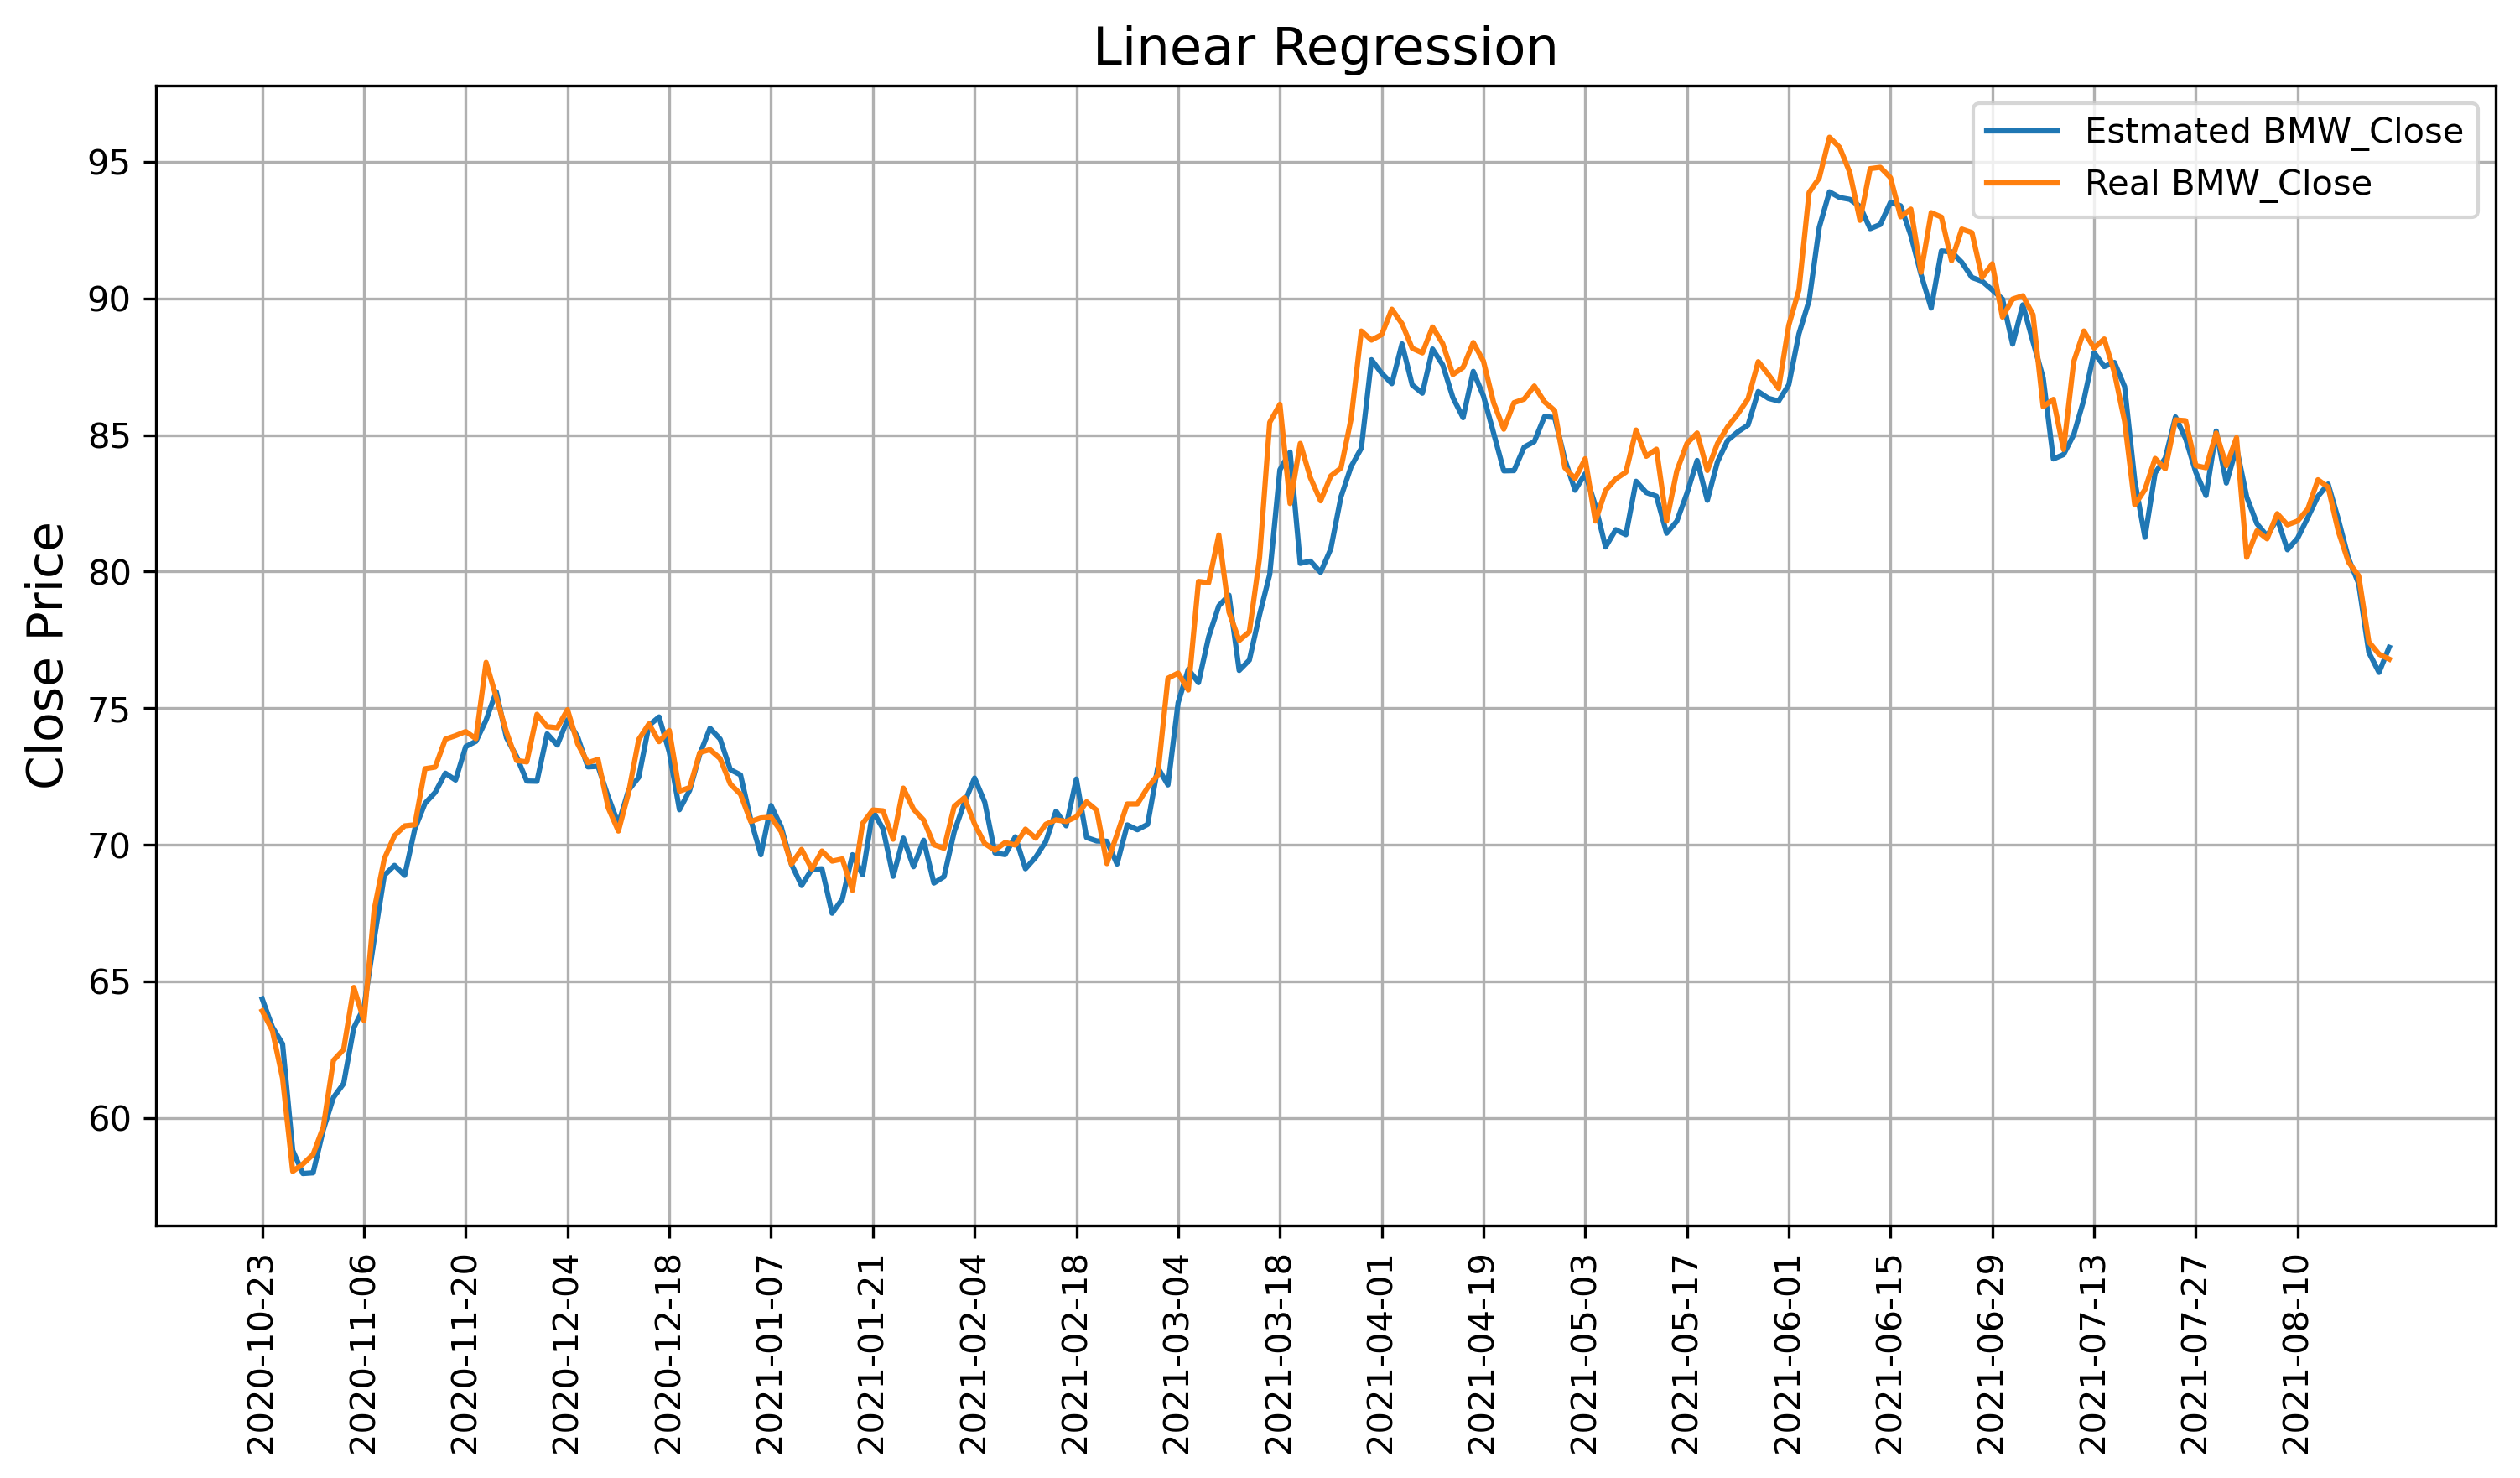

r2_socre: 0.9735213423180638


In [47]:
y_pred_LR = result_plot(LR, 'Linear Regression', x_train, y_train, x_test, y_test)

### Linear model: Ridge

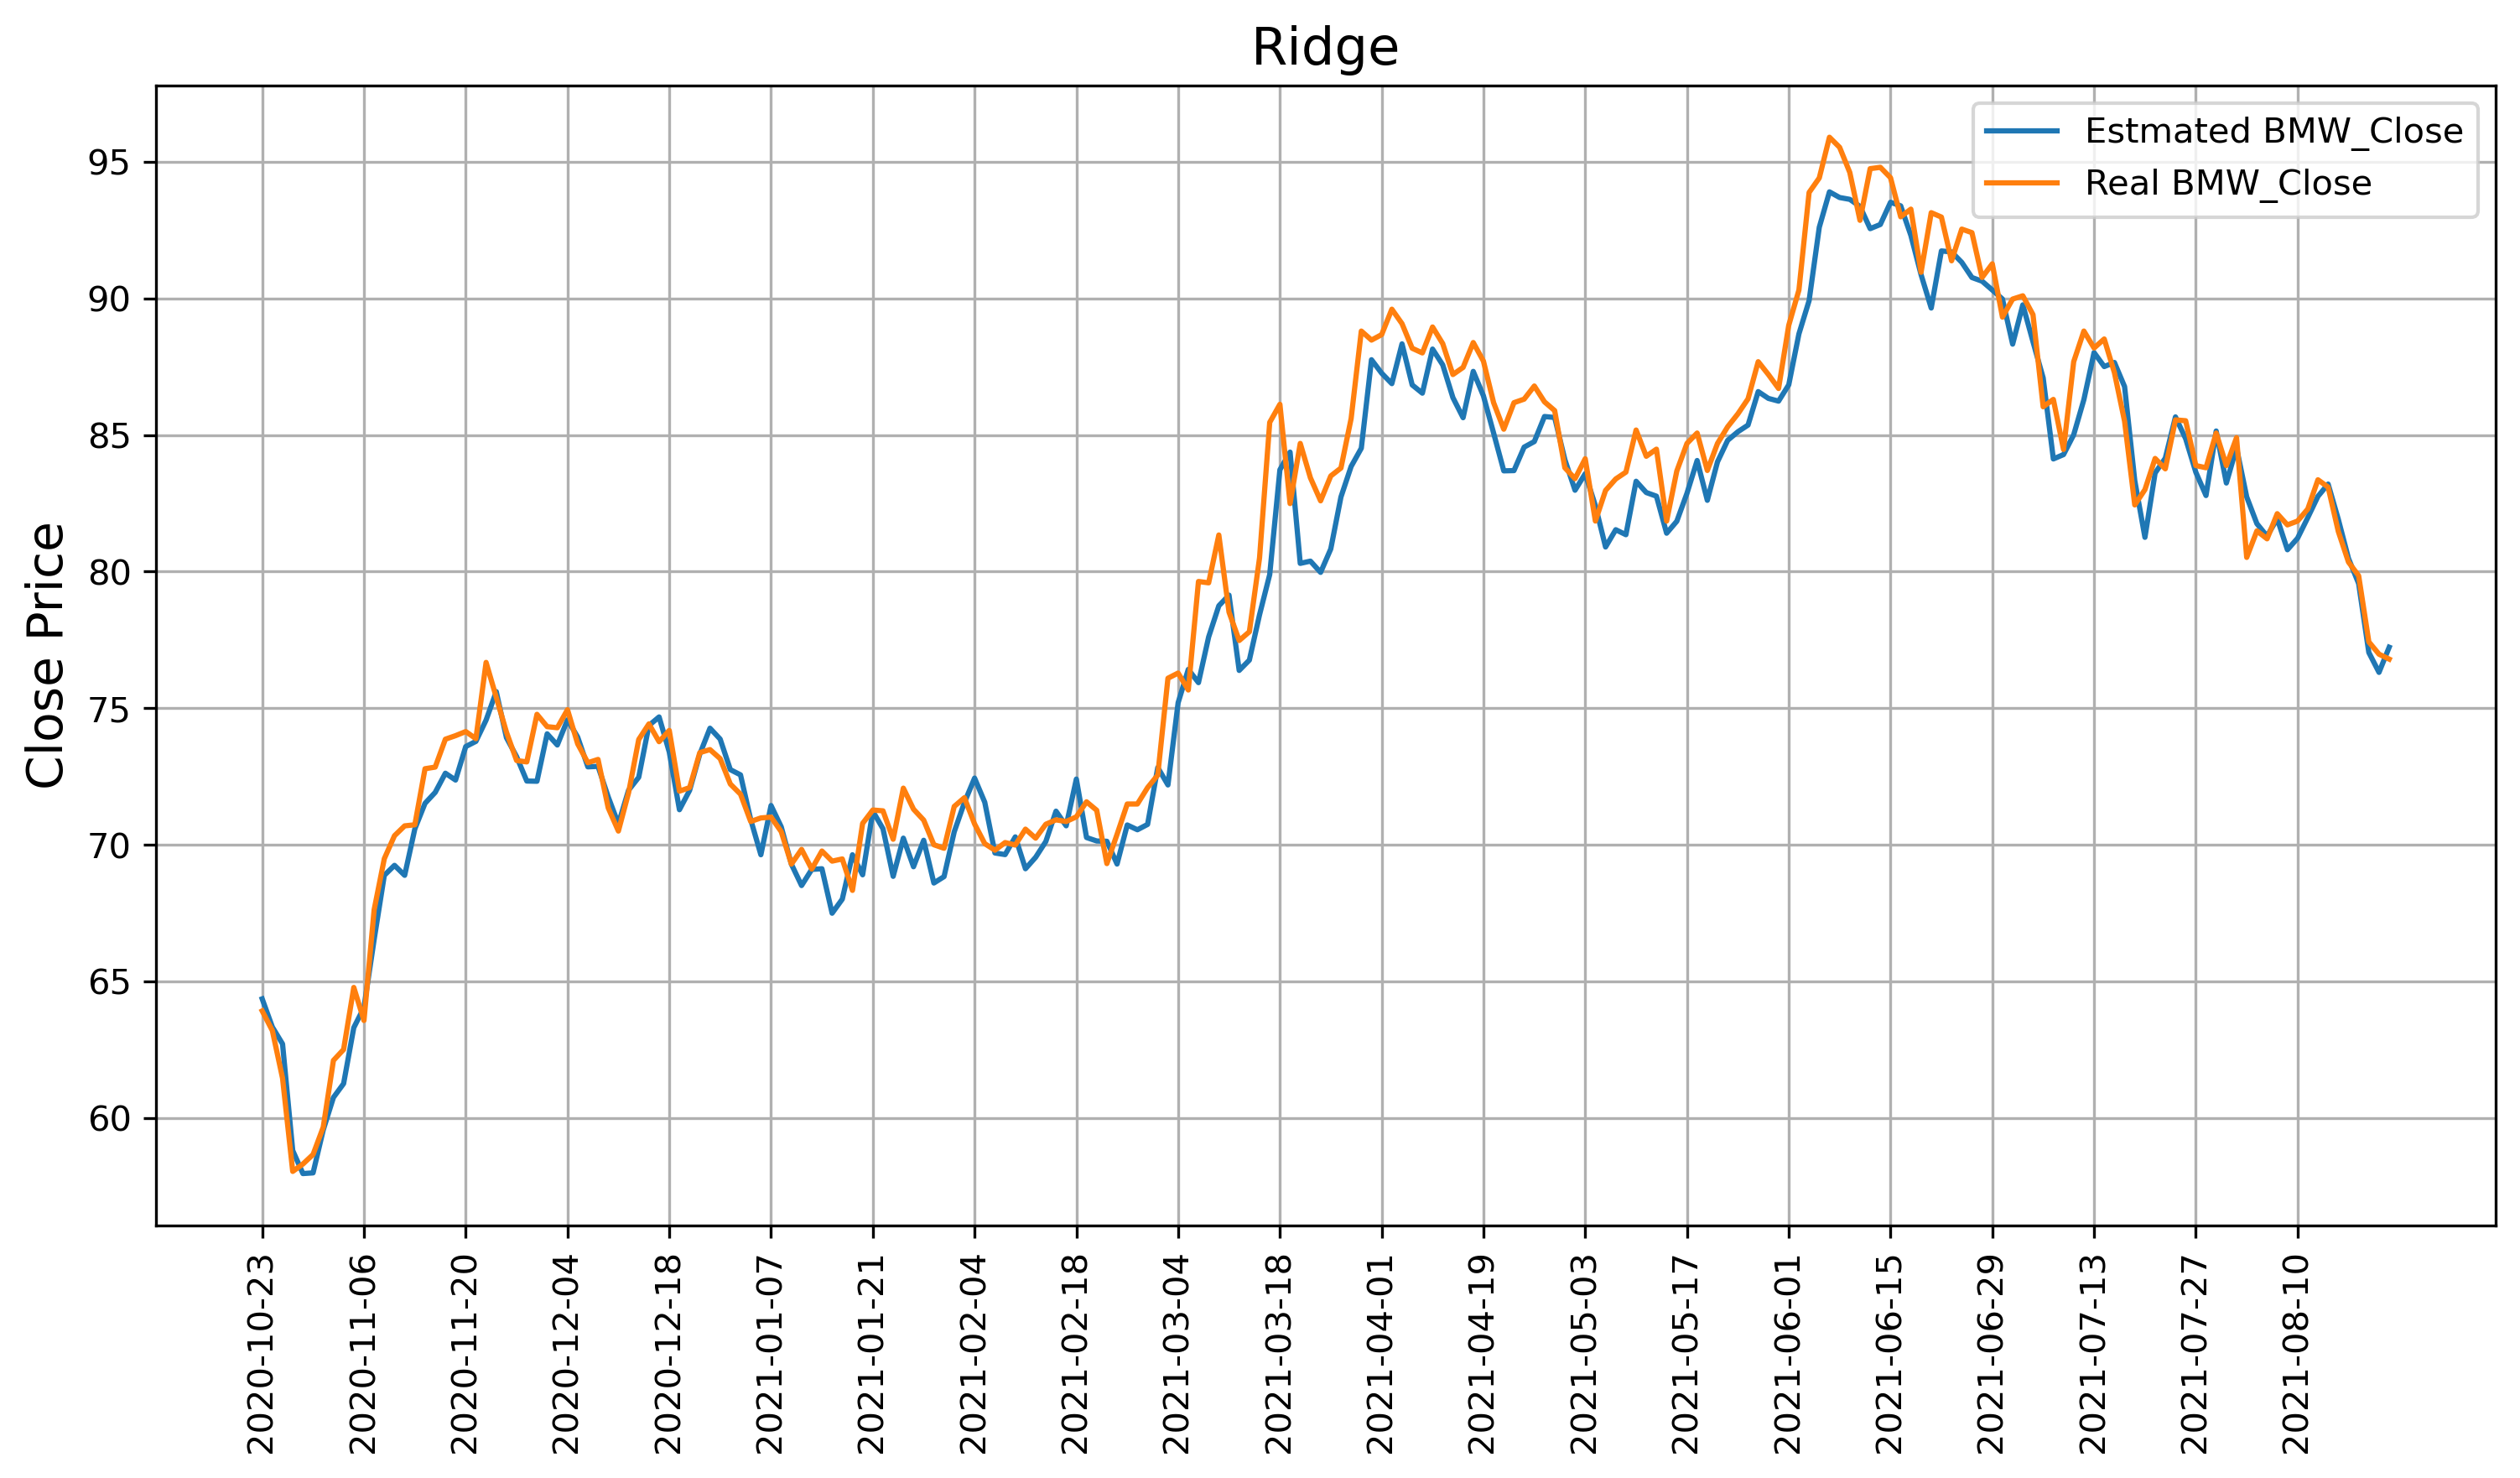

r2_socre: 0.9735202053556904


In [48]:
y_pred_Ridge = result_plot(Ridge_model, 'Ridge', x_train, y_train, x_test, y_test)

## Geometric Mean

In [49]:
from scipy.stats.mstats import gmean

In [50]:
y_pred_gmean = gmean([y_pred_xgb, y_pred_rf, y_pred_LR, y_pred_Ridge])

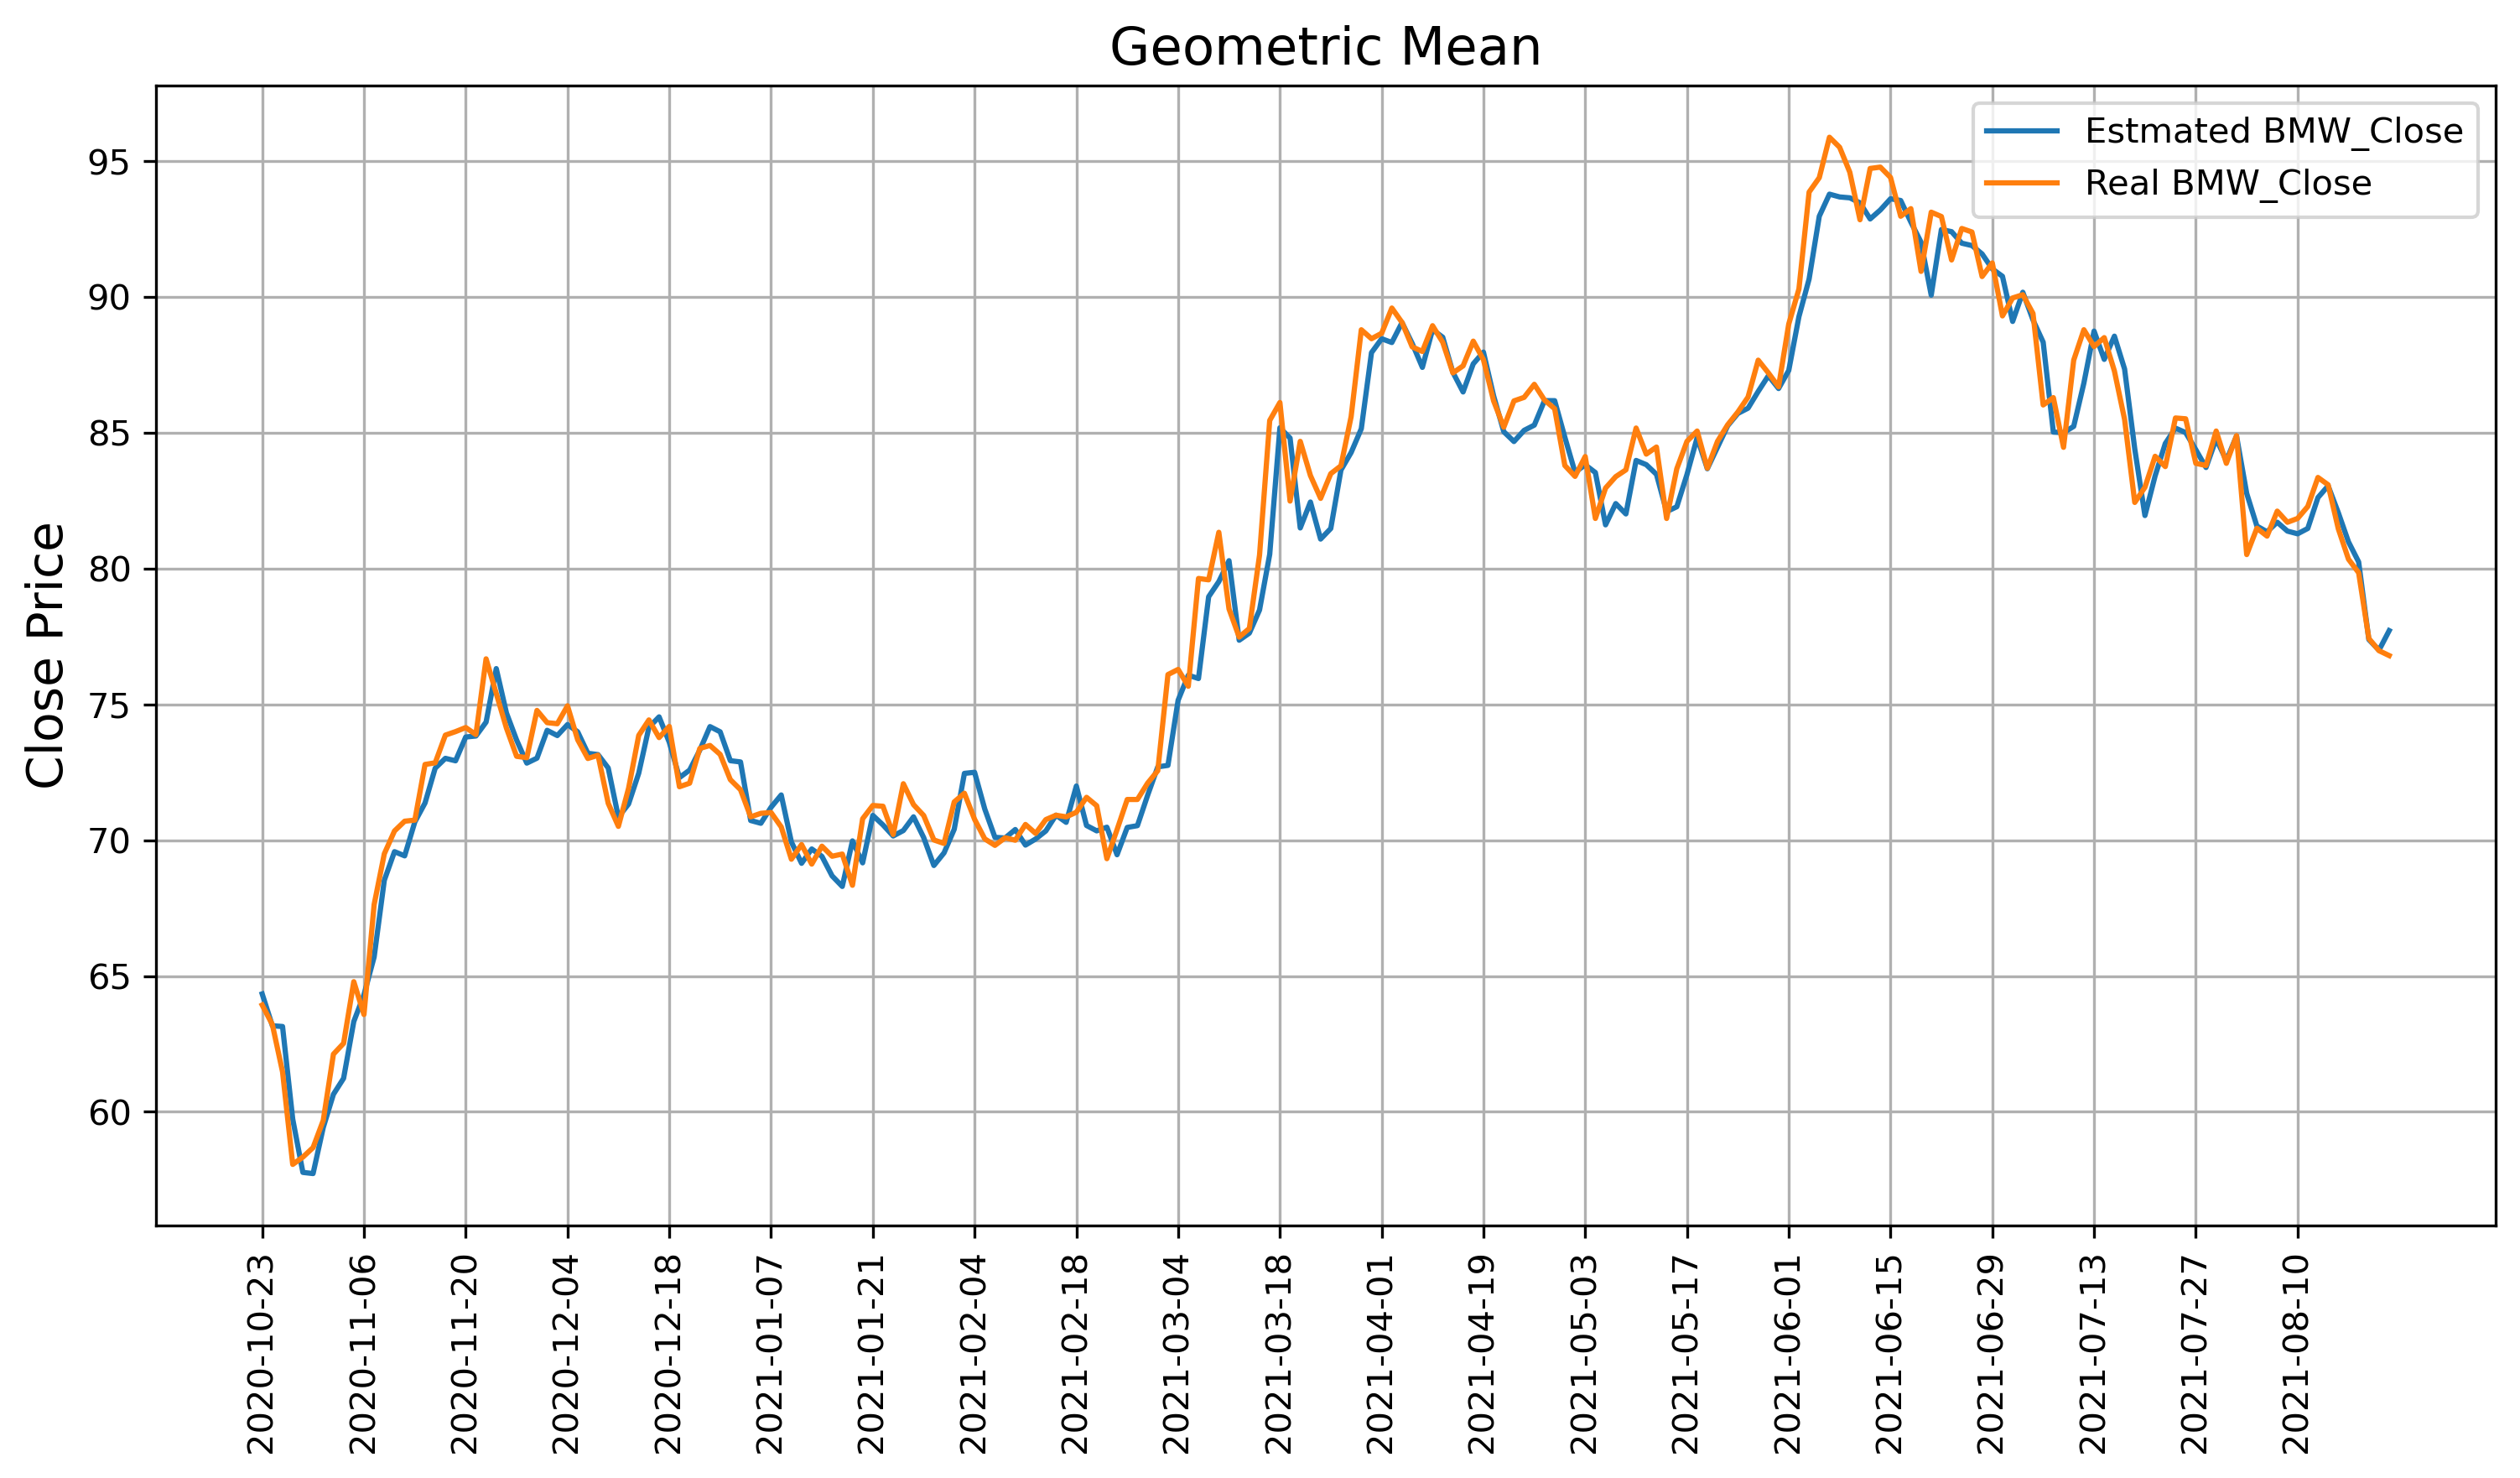

r2_socre: 0.9819188780513233


In [51]:
plt.figure(figsize=(12,6),dpi=300)
plt.plot(y_pred_gmean, label="Estmated BMW_Close")
plt.plot(y_test, label="Real BMW_Close")
plt.title('Geometric Mean', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()
print('r2_socre:', r2_score(y_test, y_pred_gmean, multioutput='uniform_average'))

## All

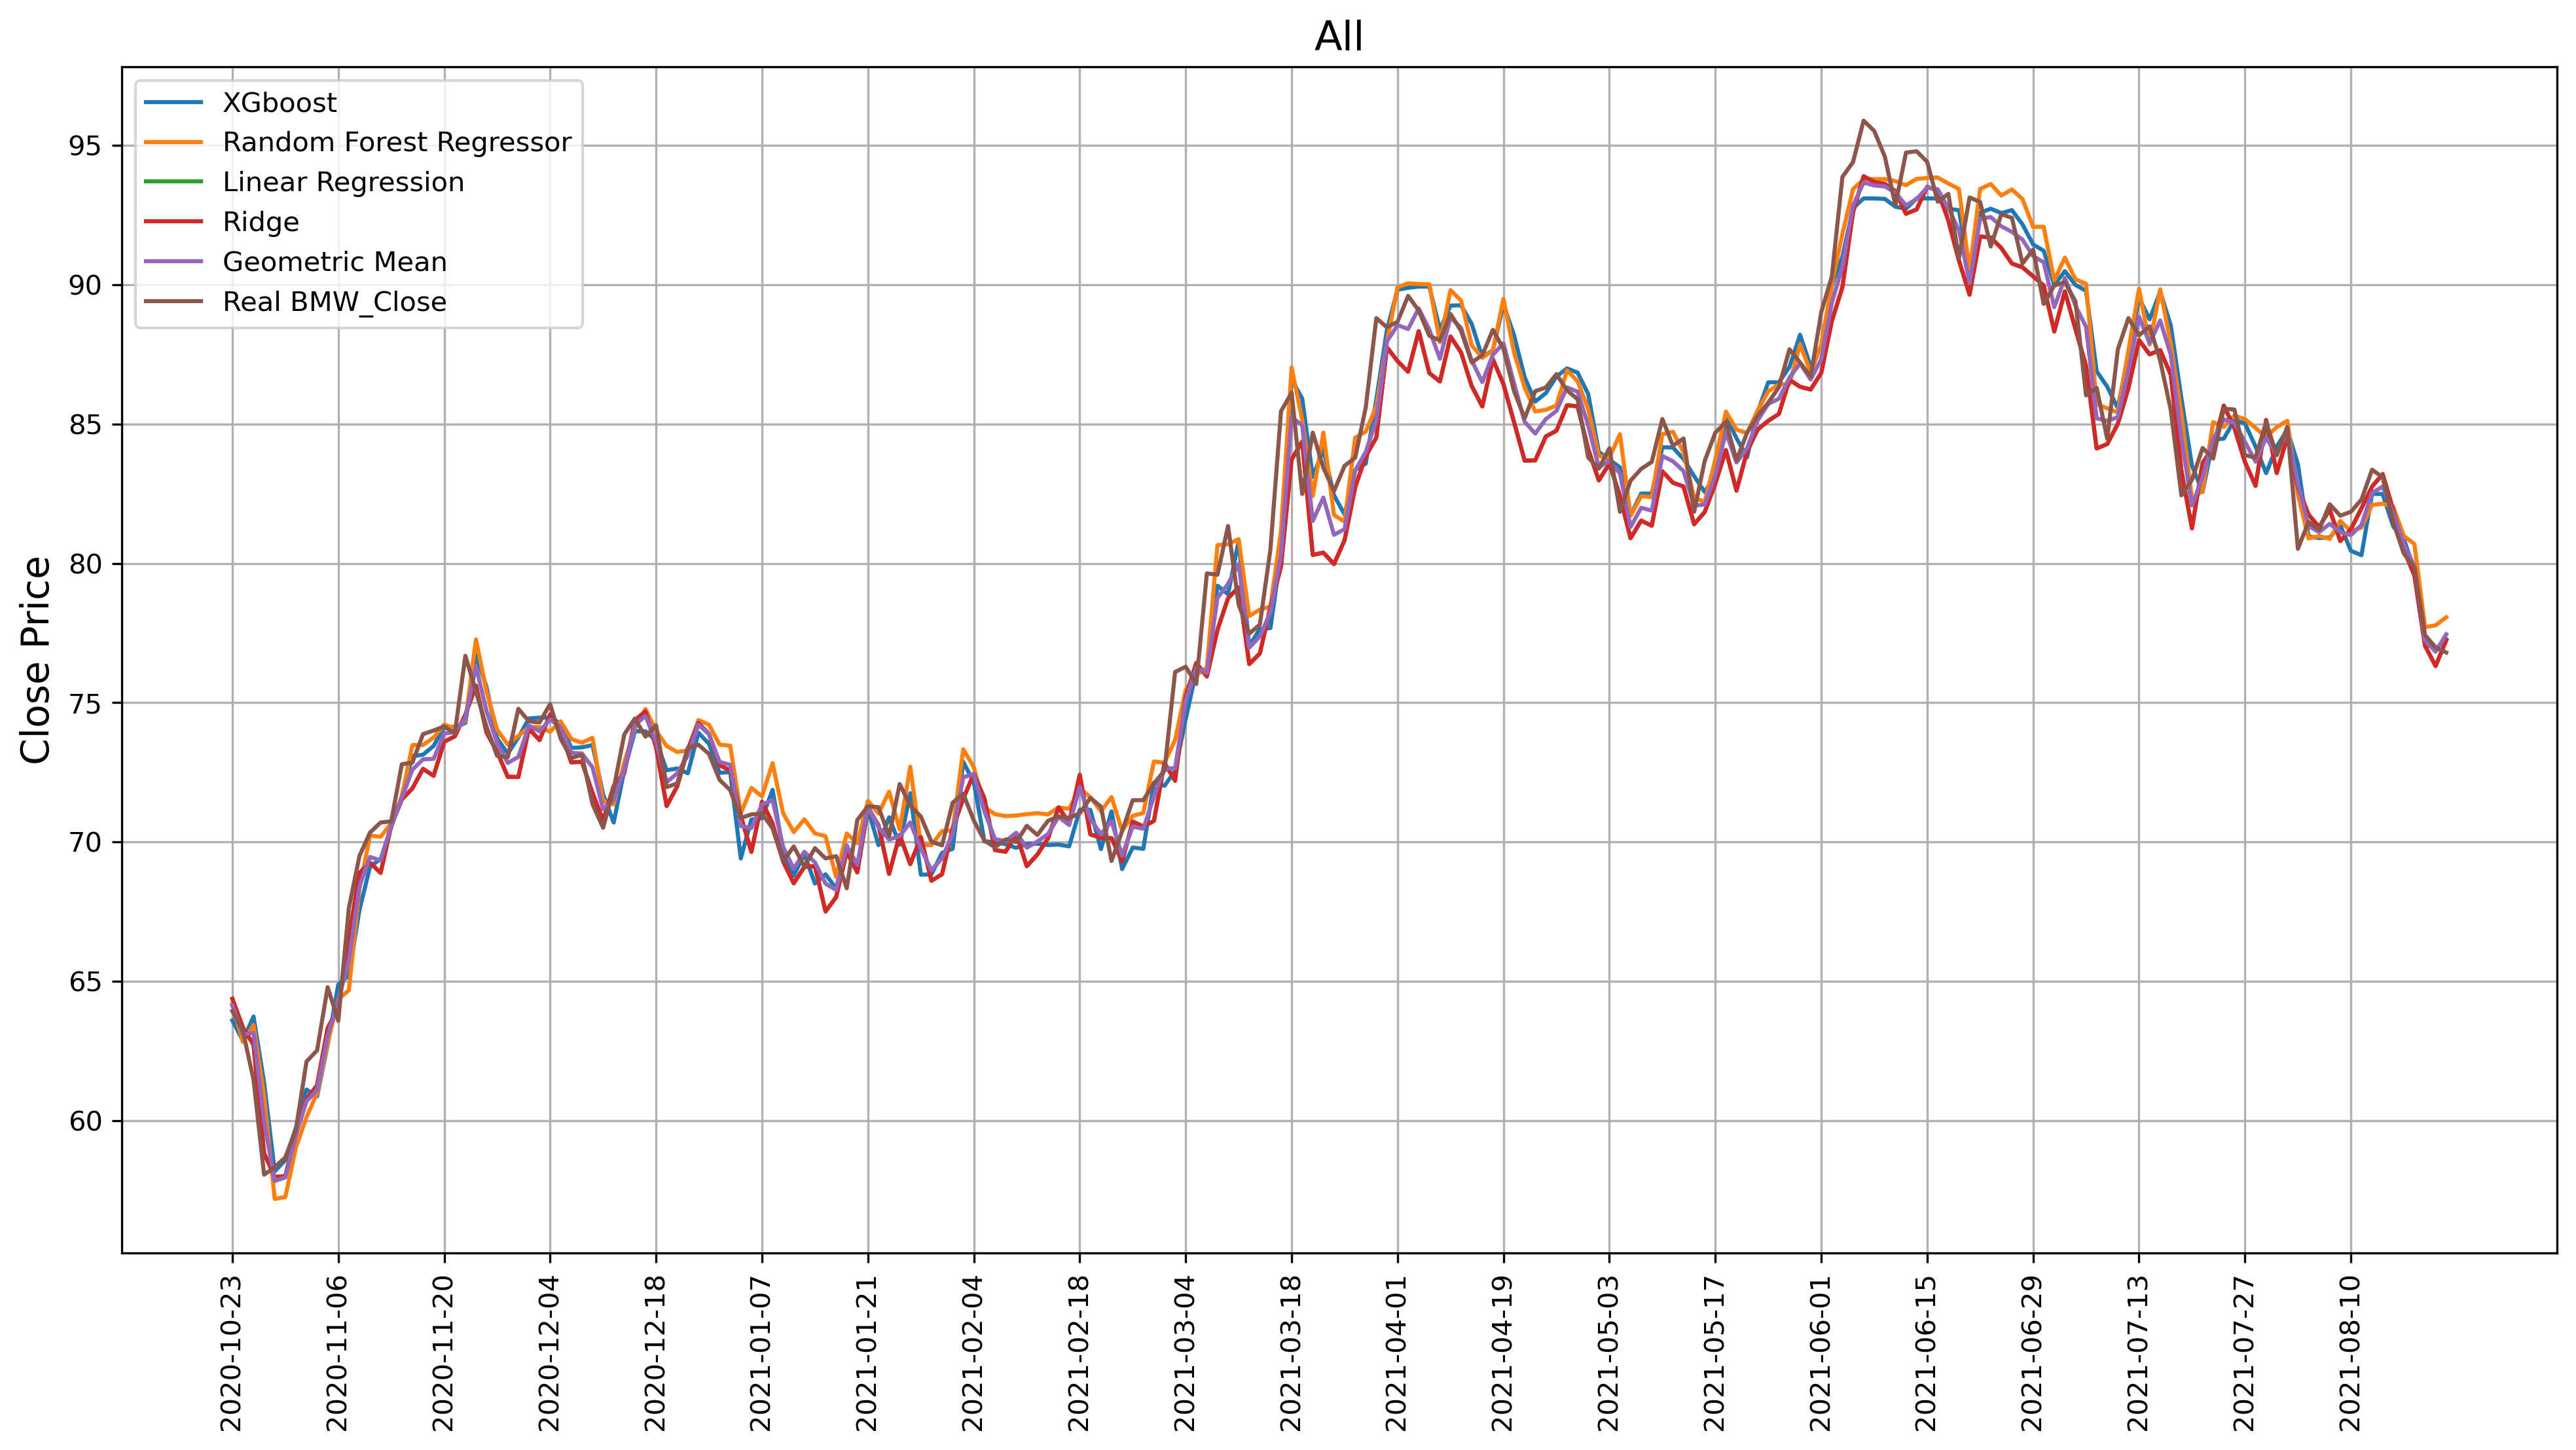

In [119]:
plt.figure(figsize=(16,8),dpi=300)
plt.plot(y_pred_xgb, label="XGboost")
plt.plot(y_pred_rf, label="Random Forest Regressor")
plt.plot(y_pred_LR, label="Linear Regression")
plt.plot(y_pred_Ridge, label="Ridge")
plt.plot(y_pred_gmean, label="Geometric Mean")
plt.plot(y_test, label="Real BMW_Close")
plt.title('All', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()

In [83]:
value1 = list()
for i in range(len(y_test)):
    value1.append(np.abs([y_test[i]-y_pred_xgb[i]]))

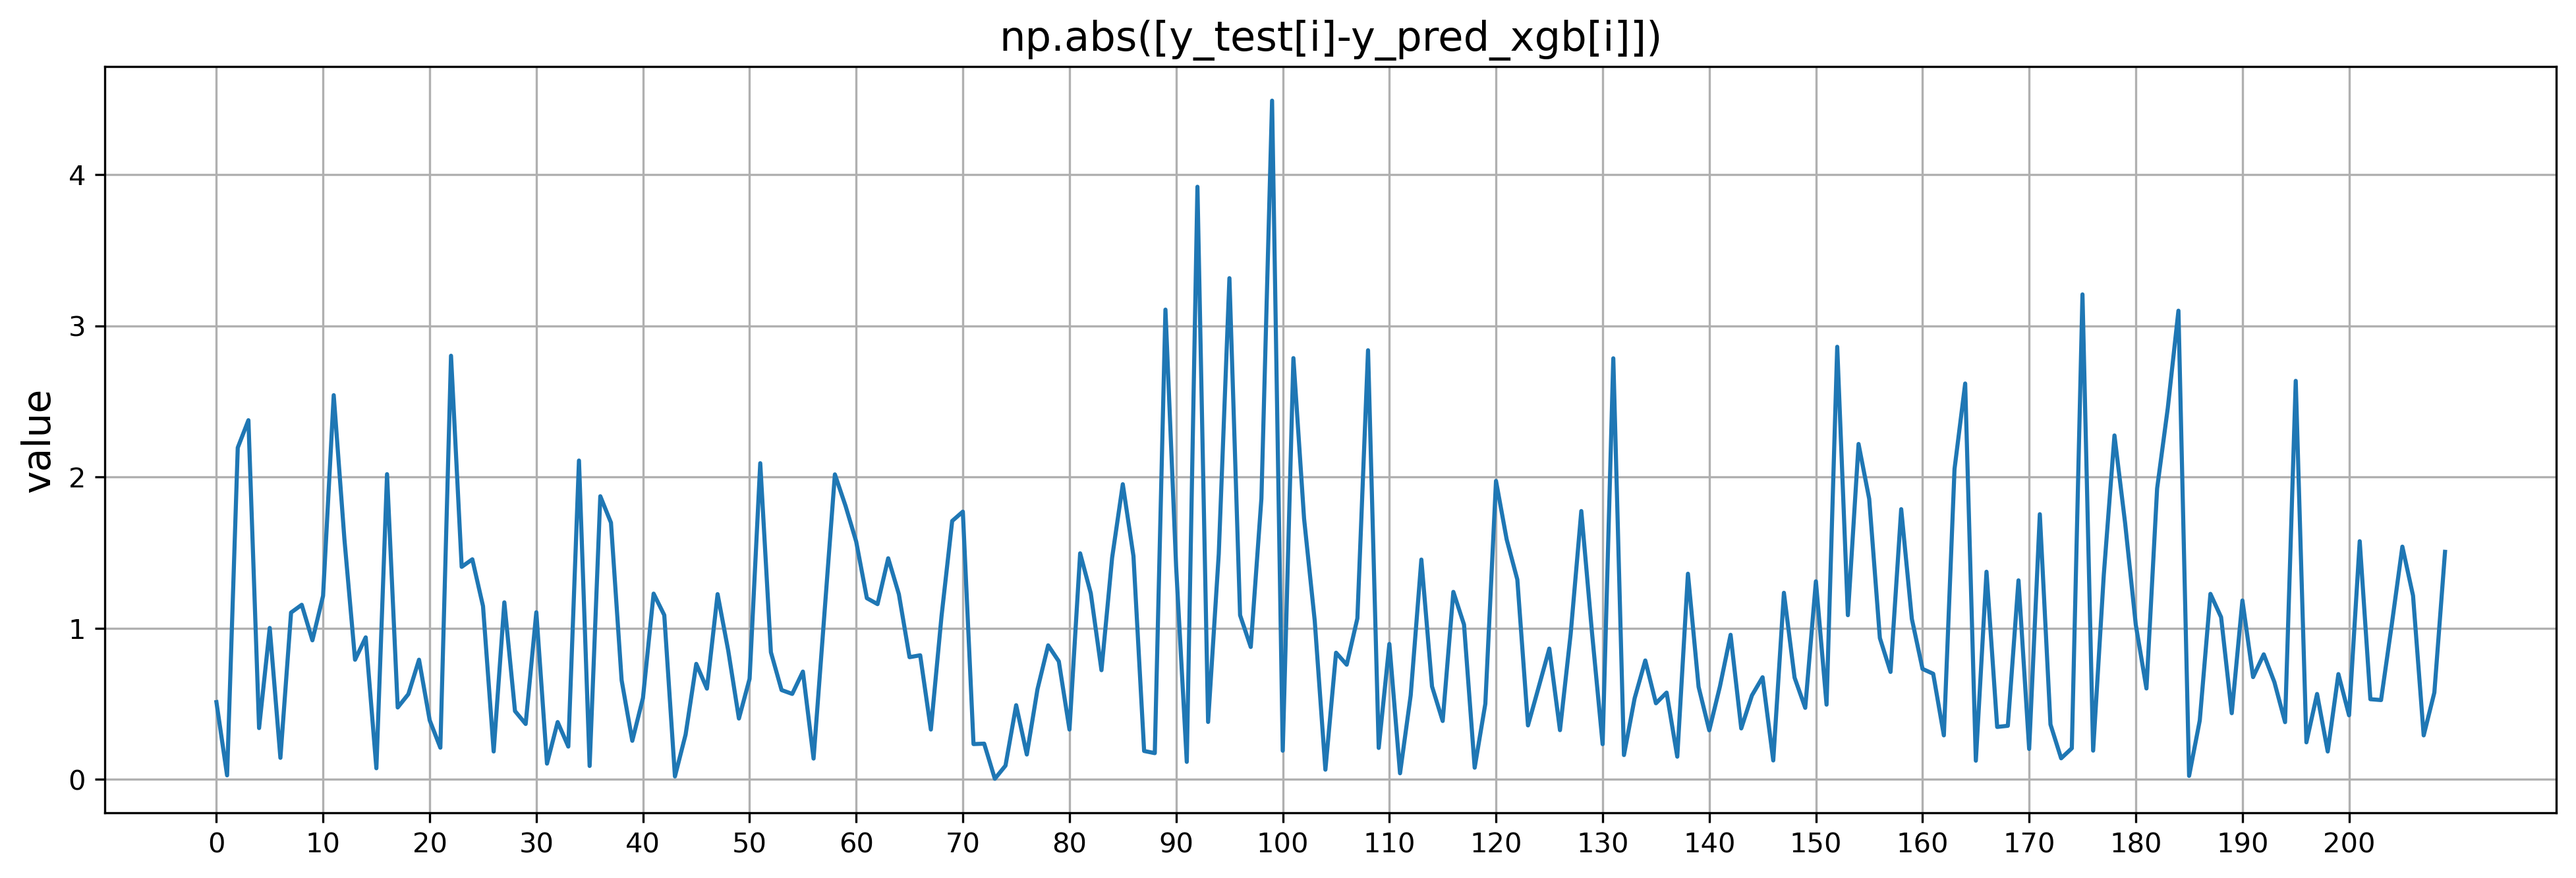

In [84]:
plt.figure(figsize=(16,5),dpi=300)
plt.plot(value1)
plt.title('np.abs([y_test[i]-y_pred_xgb[i]])', fontsize=15)
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0],10))
plt.ylabel('value', fontsize=14)
plt.show()

In [54]:
coef = pd.Series(LR.coef_, index=DATA_L.columns[DATA_L.columns != 'bmw_Close'])
coef

bmw_Open                     0.751552
bmw_High_yesterday           0.024604
bmw_Low_yesterday            0.173958
Volkswagen_Open             -0.079092
Volkswagen_High_yesterday   -0.004971
                               ...   
CSI300_Close_yesterday       0.000506
USDX_Open                    0.119488
USDX_High_yesterday         -0.228466
USDX_Low_yesterday          -0.010139
USDX_Close_yesterday         0.180130
Length: 63, dtype: float64

Text(0.5, 1.0, 'Feature importance for BMW_Close')

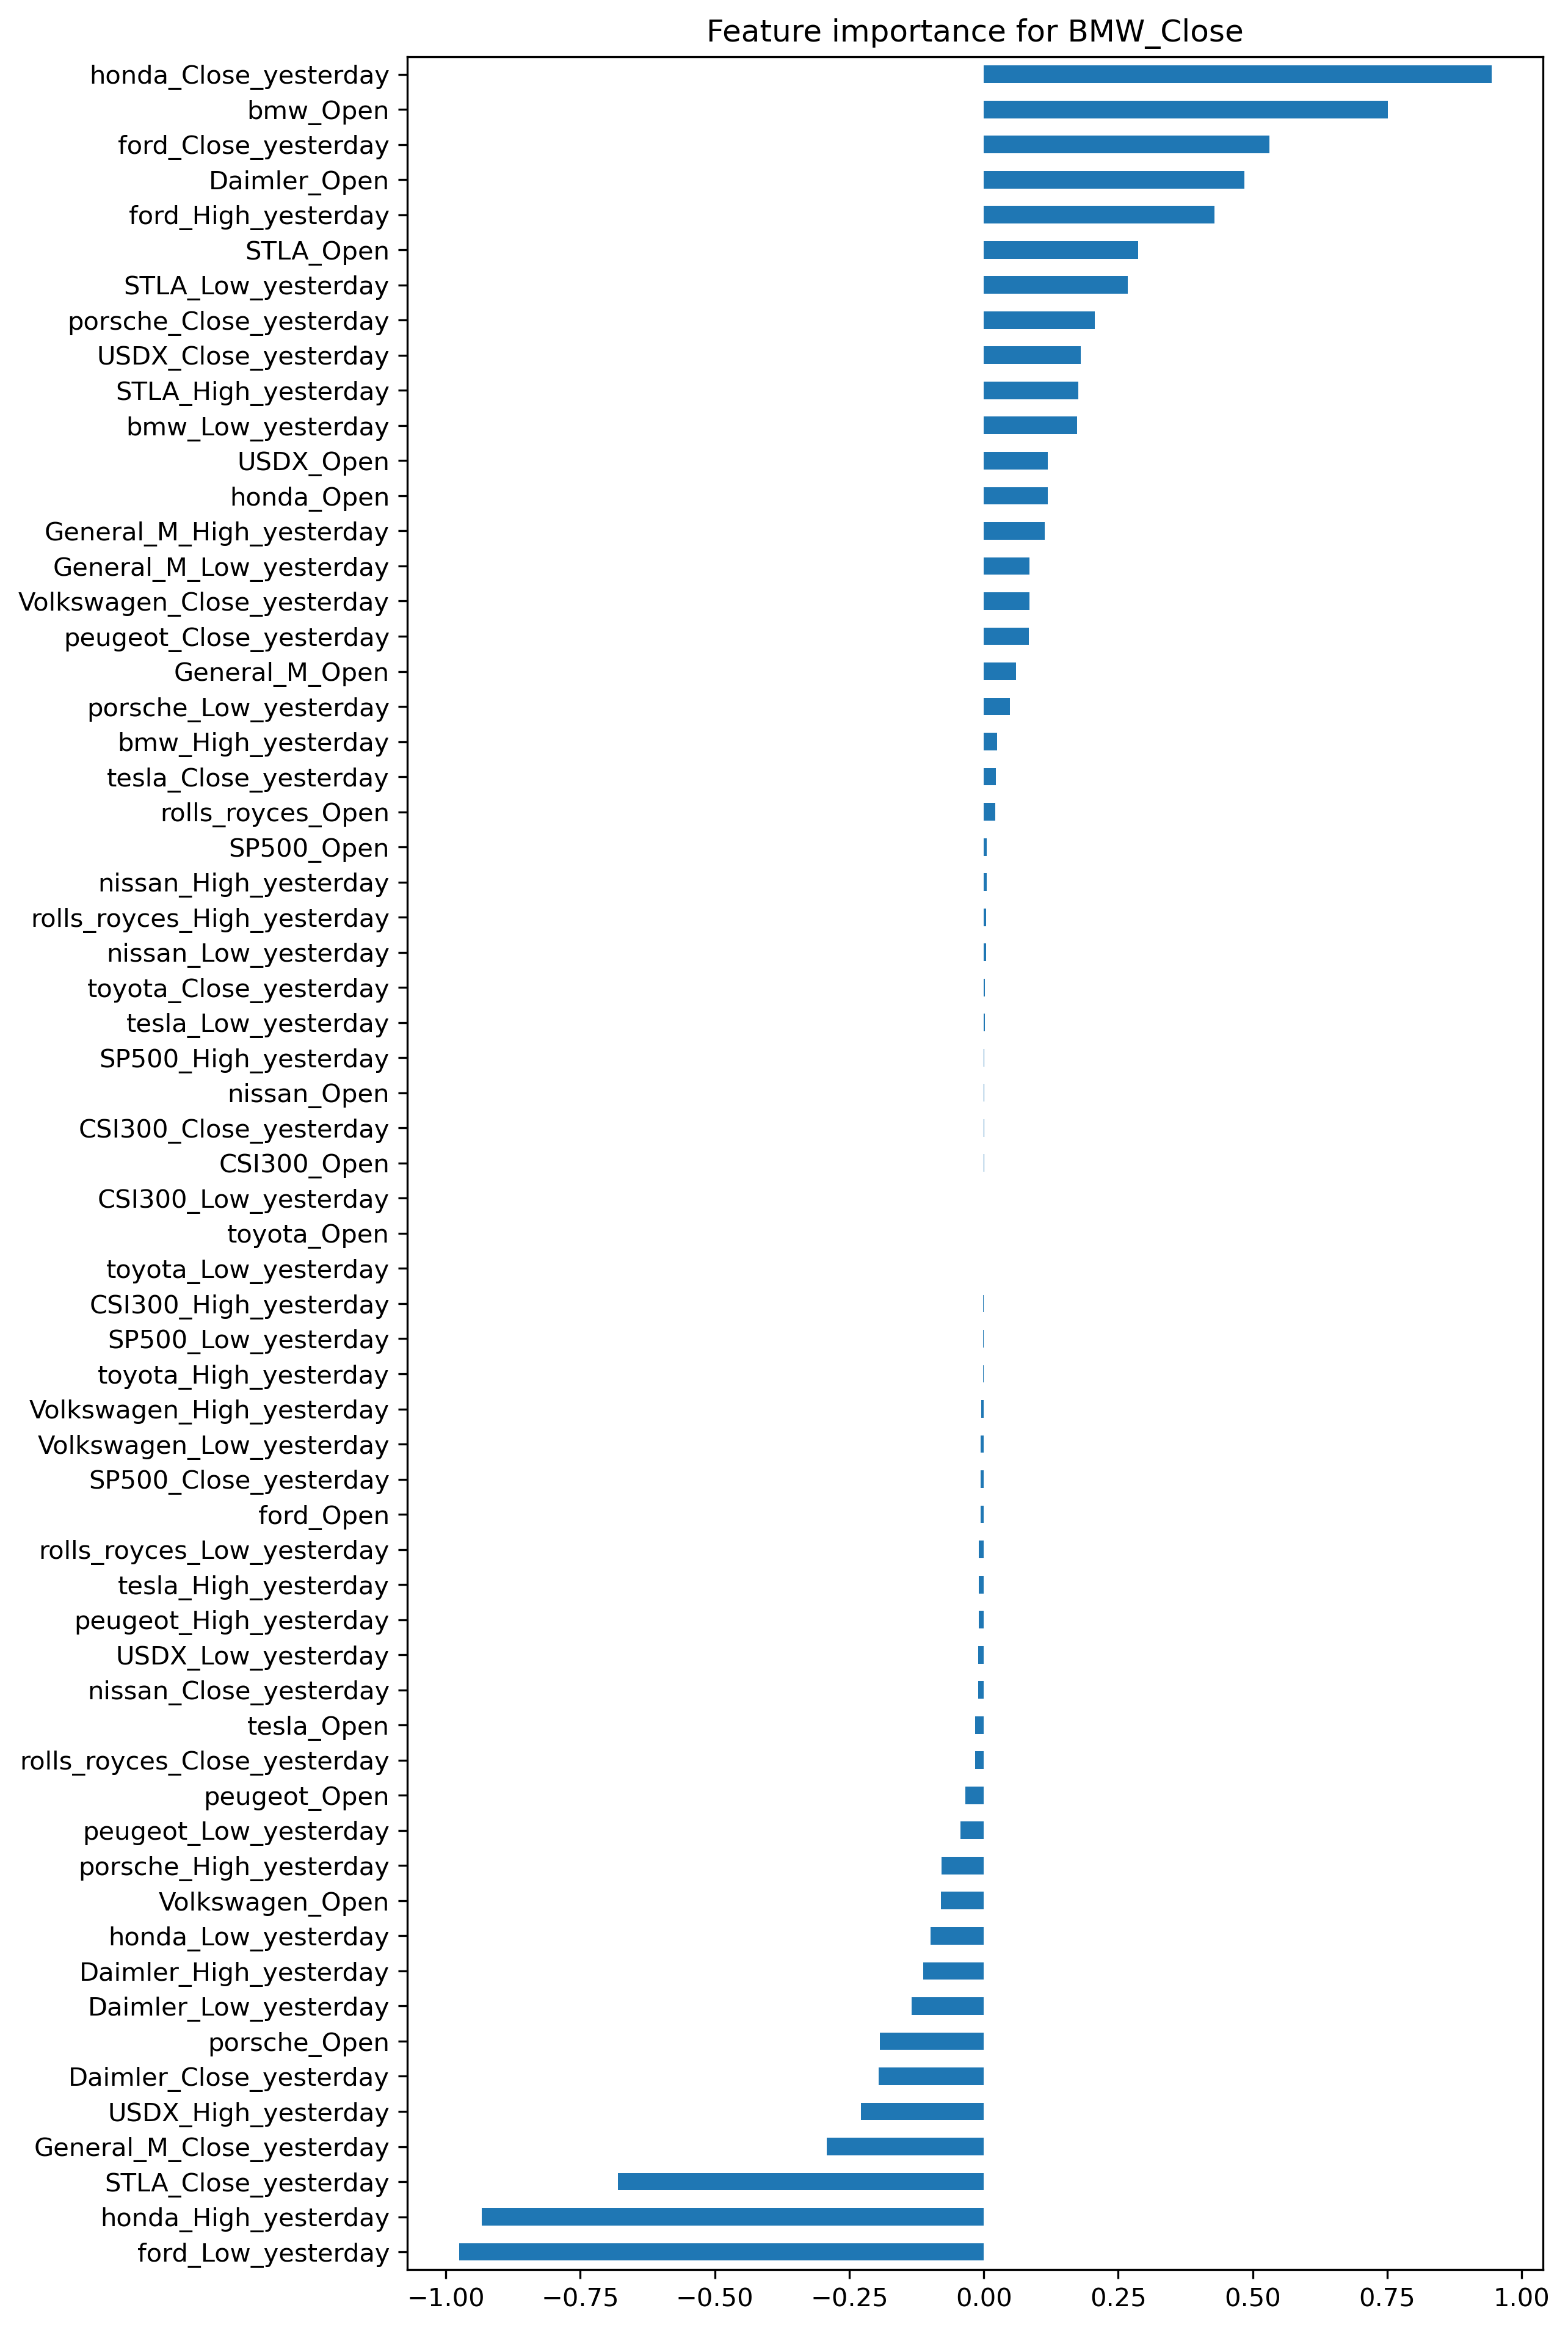

In [55]:
plt.figure(figsize=(8,16),dpi=300)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance for BMW_Close")

# (08.24-09.07)

## Get data

### SP500

In [97]:
import pandas_datareader.data as pdr

In [171]:
sp500_15 = pdr.DataReader(name='^GSPC',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [173]:
sp500_15.to_csv('./data/sp500_15.csv')

In [56]:
sp500_15 = fuer('sp500_15')
sp500_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,4484.399902,4489.879883,4450.290039,4479.529785
2021-08-25,4490.450195,4492.810059,4482.279785,4486.229980
2021-08-26,4493.750000,4501.709961,4485.660156,4496.189941
2021-08-27,4474.100098,4495.899902,4468.990234,4470.000000
2021-08-30,4513.759766,4513.330078,4474.100098,4509.370117
2021-08-31,4529.750000,4537.359863,4513.759766,4528.790039
2021-09-01,4528.799805,4531.390137,4515.799805,4522.680176
2021-09-02,4534.479980,4537.109863,4522.020020,4524.089844
2021-09-03,4532.419922,4545.850098,4524.660156,4536.950195


### CSI300

In [175]:
import tushare as ts

In [176]:
CSI300_15 = ts.get_k_data('hs300', start='2021-08-23',
                          end='2021-09-07').reset_index(drop=True)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [177]:
CSI300_15 = CSI300_15.iloc[:, :-1]
for name in CSI300_15.columns:
    CSI300_15 = CSI300_15.rename(columns={name: name.title()})

In [178]:
csi300_15 = CSI300_15.copy().set_index('Date')
csi300_15

,Open,Close,High,Low,Volume
Date,,,,,
2021-08-23,4777.73,4835.88,4843.82,4764.01,167579093.0
2021-08-24,4844.59,4888.39,4906.20,4842.75,197883163.0
2021-08-25,4890.52,4898.16,4899.77,4865.76,189448016.0
2021-08-26,4892.20,4801.61,4892.20,4798.70,197617387.0
2021-08-27,4794.97,4827.04,4863.47,4793.59,183310211.0
2021-08-30,4847.03,4813.27,4849.16,4787.20,219635757.0
2021-08-31,4803.09,4805.61,4821.76,4740.75,235118658.0
2021-09-01,4804.69,4869.46,4906.40,4763.30,326721080.0
2021-09-02,4865.82,4869.41,4892.70,4845.62,267858013.0


In [179]:
csi300_15.to_csv('./data/CSI300_15.csv')

In [57]:
CSI300_15 = loadData('CSI300_15').iloc[:, :-1]
CSI300_15['High_yesterday'] = CSI300_15['High'].shift(1)
CSI300_15['Low_yesterday'] = CSI300_15['Low'].shift(1)
CSI300_15['Close_yesterday'] = CSI300_15['Close'].shift(1)
CSI300_15 = CSI300_15.drop(['High','Low','Close'],axis=1).iloc[1:]
CSI300_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,4844.59,4843.82,4764.01,4835.88
2021-08-25,4890.52,4906.20,4842.75,4888.39
2021-08-26,4892.20,4899.77,4865.76,4898.16
2021-08-27,4794.97,4892.20,4798.70,4801.61
2021-08-30,4847.03,4863.47,4793.59,4827.04
2021-08-31,4803.09,4849.16,4787.20,4813.27
2021-09-01,4804.69,4821.76,4740.75,4805.61
2021-09-02,4865.82,4906.40,4763.30,4869.46
2021-09-03,4875.07,4892.70,4845.62,4869.41


### USDX

In [185]:
USDX_15 = pdr.DataReader(name='DX-Y.NYB',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [186]:
USDX_15.to_csv('./data/USDX_15.csv')

In [58]:
USDX_15 = fuer('USDX_15')
USDX_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,92.989998,93.510002,92.949997,92.959999
2021-08-25,92.879997,93.080002,92.809998,92.889999
2021-08-26,92.830002,93.129997,92.809998,92.830002
2021-08-27,93.029999,93.080002,92.809998,93.059998
2021-08-30,92.680000,93.180000,92.629997,92.690002
2021-08-31,92.709999,92.790001,92.599998,92.650002
2021-09-01,92.660004,92.750000,92.400002,92.629997
2021-09-02,92.510002,92.790001,92.379997,92.449997
2021-09-03,92.220001,92.540001,92.209999,92.230003


### car companies

#### BMW

In [189]:
bmw_15 = pdr.DataReader(name='BMW.DE',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [191]:
bmw_15.to_csv('./data/bmw_15.csv')

In [59]:
bmw_15 = loadData('bmw_15').iloc[:, :-2]
bmw_15['High_yesterday'] = bmw_15['High'].shift(1)
bmw_15['Low_yesterday'] = bmw_15['Low'].shift(1)
bmw_15 = bmw_15.drop(['High','Low'],axis=1).iloc[1:]
bmw_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,77.199997,78.419998,78.480003,76.570000
2021-08-25,78.349998,78.000000,78.970001,76.930000
2021-08-26,77.250000,77.940002,78.989998,77.419998
2021-08-27,78.279999,78.279999,78.220001,76.690002
2021-08-30,78.599998,79.050003,78.489998,77.339996
2021-08-31,79.480003,80.370003,79.239998,77.779999
2021-09-01,81.339996,79.470001,81.180000,79.440002
2021-09-02,79.690002,79.419998,81.559998,79.150002
2021-09-03,79.900002,79.400002,80.000000,79.300003


#### Volkswagen

In [196]:
Volkswagen_15 = pdr.DataReader(name='VOW3.DE',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [198]:
Volkswagen_15.to_csv('./data/Volkswagen_15.csv')

In [60]:
Volkswagen_15 = fuer('Volkswagen_15')
Volkswagen_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,196.179993,196.000000,193.500000,194.539993
2021-08-25,199.380005,199.740005,195.399994,198.759995
2021-08-26,198.600006,202.250000,198.000000,199.699997
2021-08-27,200.050003,201.449997,197.520004,200.000000
2021-08-30,201.350006,200.800003,198.699997,200.750000
2021-08-31,202.350006,202.250000,200.800003,201.000000
2021-09-01,203.800003,203.850006,199.179993,201.300003
2021-09-02,202.500000,204.350006,199.979996,201.050003
2021-09-03,202.800003,203.300003,199.979996,202.699997


#### tesla

In [200]:
tesla_15 = pdr.DataReader(name='TSLA',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [202]:
tesla_15.to_csv('./data/tesla_15.csv')

In [61]:
tesla_15 = fuer('tesla_15')
tesla_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,710.679993,712.130005,680.750000,706.299988
2021-08-25,707.030029,715.219971,702.640015,708.489990
2021-08-26,708.309998,716.969971,704.000000,711.200012
2021-08-27,705.000000,715.400024,697.619995,701.159973
2021-08-30,714.719971,715.000000,702.099976,711.919983
2021-08-31,733.000000,731.000000,712.729980,730.909973
2021-09-01,734.080017,740.390015,726.440002,735.719971
2021-09-02,734.500000,741.989990,731.270020,734.090027
2021-09-03,732.250000,740.969971,730.539978,732.390015


#### nissian

In [205]:
nissan_15 = pdr.DataReader(name='7201.T',data_source='yahoo',start='2021-08-23',end='2021-09-07')

In [207]:
nissan_15.to_csv('./data/nissan_15.csv')

In [62]:
nissan_15 = fuer('nissan_15')
nissan_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,546.299988,550.000000,533.500000,542.599976
2021-08-25,562.799988,562.799988,546.299988,559.799988
2021-08-26,570.799988,576.299988,560.500000,568.299988
2021-08-27,557.599976,571.700012,560.299988,566.000000
2021-08-30,586.099976,569.099976,555.599976,569.099976
2021-08-31,566.000000,587.599976,575.500000,579.400024
2021-09-01,583.799988,581.400024,563.700012,578.500000
2021-09-02,570.500000,585.200012,573.599976,575.400024
2021-09-03,561.400024,572.700012,556.099976,559.099976


#### honda

In [209]:
honda_15 = pdr.DataReader(name='HMC',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [211]:
honda_15.to_csv('./data/honda_15.csv')

In [63]:
honda_15 = fuer('honda_15')
honda_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,30.100000,30.200001,29.809999,30.110001
2021-08-25,30.070000,30.340000,30.049999,30.200001
2021-08-26,29.910000,30.190001,29.879999,30.100000
2021-08-27,29.530001,29.910000,29.350000,29.389999
2021-08-30,30.020000,29.870001,29.530001,29.850000
2021-08-31,30.110001,30.049999,29.809999,29.879999
2021-09-01,30.440001,30.400000,30.070000,30.260000
2021-09-02,30.540001,30.580000,30.360001,30.450001
2021-09-03,30.709999,30.590000,30.330000,30.459999


#### other

In [217]:
toyota_15 = pdr.DataReader(name='7203.T',data_source='yahoo',start='2021-08-23',end='2021-09-07')

In [219]:
toyota_15.to_csv('./data/toyota_15.csv')

In [64]:
toyota_15 = fuer('toyota_15')
toyota_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,9289,9273.0,9048.0,9222.0
2021-08-25,9370,9314.0,9236.0,9272.0
2021-08-26,9550,9559.0,9365.0,9484.0
2021-08-27,9409,9571.0,9435.0,9507.0
2021-08-30,9522,9487.0,9401.0,9460.0
2021-08-31,9506,9563.0,9502.0,9534.0
2021-09-01,9701,9619.0,9456.0,9592.0
2021-09-02,9645,9721.0,9621.0,9652.0
2021-09-03,9640,9665.0,9592.0,9650.0


In [221]:
porsche_15 = pdr.DataReader(name='PAH3.DE',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [223]:
porsche_15.to_csv('./data/porsche_15.csv')

In [65]:
porsche_15 = fuer('porsche_15')
porsche_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,83.580002,83.660004,82.419998,83.040001
2021-08-25,85.559998,86.040001,83.500000,85.360001
2021-08-26,85.300003,87.080002,85.260002,85.940002
2021-08-27,85.500000,86.040001,84.660004,85.500000
2021-08-30,86.279999,86.139999,84.760002,85.940002
2021-08-31,87.199997,87.839996,86.279999,86.900002
2021-09-01,86.400002,87.519997,85.180000,85.760002
2021-09-02,86.260002,86.500000,85.000000,85.519997
2021-09-03,87.500000,87.500000,85.800003,87.160004


In [225]:
Daimler_15 = pdr.DataReader(name='DDAIF',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [227]:
Daimler_15.to_csv('./data/Daimler_15.csv')

In [66]:
Daimler_15 = fuer('Daimler_15')
Daimler_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,83.269997,82.690002,81.919998,82.129997
2021-08-25,83.750000,83.559998,82.959999,83.199997
2021-08-26,83.190002,83.889999,83.379997,83.559998
2021-08-27,83.209999,83.400002,82.900002,82.930000
2021-08-30,84.309998,84.169998,83.209999,84.059998
2021-08-31,83.690002,84.900002,84.309998,84.500000
2021-09-01,83.699997,84.570000,83.690002,84.250000
2021-09-02,83.510002,84.500000,83.699997,84.129997
2021-09-03,83.410004,84.449997,83.500000,83.620003


In [231]:
General_M_15 = pdr.DataReader(name='GM',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [233]:
General_M_15.to_csv('./data/General_M_15.csv')

In [67]:
General_M_15 = fuer('General_M_15')
General_M_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,48.500000,48.349998,47.070000,48.180000
2021-08-25,49.490002,49.869999,48.230000,49.570000
2021-08-26,49.470001,49.930000,49.160000,49.700001
2021-08-27,48.750000,49.470001,48.520000,48.619999
2021-08-30,49.950001,50.070000,48.660000,49.799999
2021-08-31,49.169998,49.950001,48.950001,49.169998
2021-09-01,49.099998,49.430000,48.669998,49.009998
2021-09-02,49.150002,49.639999,48.680000,49.110001
2021-09-03,48.799999,49.500000,48.810001,48.950001


In [235]:
ford_15 = pdr.DataReader(name='F',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [237]:
ford_15.to_csv('./data/ford_15.csv')

In [68]:
ford_15 = fuer('ford_15')
ford_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,12.81,12.85,12.47,12.73
2021-08-25,13.12,13.14,12.76,13.08
2021-08-26,13.11,13.28,13.02,13.17
2021-08-27,12.89,13.13,12.81,12.90
2021-08-30,13.35,13.37,12.87,13.31
2021-08-31,13.02,13.37,13.03,13.05
2021-09-01,13.03,13.14,12.93,13.03
2021-09-02,13.09,13.22,12.90,13.11
2021-09-03,12.99,13.21,12.97,13.01


In [239]:
peugeot_15 = pdr.DataReader(name='PEUG.PA',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [241]:
peugeot_15.to_csv('./data/peugeot_15.csv')

In [69]:
peugeot_15 = fuer('peugeot_15')
peugeot_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,114.000000,114.000000,111.400002,113.599998
2021-08-25,115.800003,114.800003,114.000000,114.599998
2021-08-26,115.400002,115.800003,114.800003,115.000000
2021-08-27,115.000000,115.800003,114.599998,115.000000
2021-08-30,116.400002,115.800003,114.599998,115.599998
2021-08-31,116.000000,117.000000,115.599998,115.599998
2021-09-01,114.800003,116.400002,114.599998,115.000000
2021-09-02,115.000000,116.000000,114.599998,115.199997
2021-09-03,117.000000,117.199997,115.000000,117.000000


In [245]:
STLA_15 = pdr.DataReader(name='STLA',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [247]:
STLA_15.to_csv('./data/STLA_15.csv')

In [70]:
STLA_15 = fuer('STLA_15')
STLA_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,20.160000,20.320000,20.090000,20.270000
2021-08-25,20.370001,20.459999,20.129999,20.360001
2021-08-26,20.190001,20.410000,20.290001,20.340000
2021-08-27,20.030001,20.230000,19.959999,20.010000
2021-08-30,20.280001,20.379999,20.030001,20.290001
2021-08-31,20.010000,20.280001,20.010000,20.010000
2021-09-01,19.879999,20.100000,19.820000,20.020000
2021-09-02,20.129999,20.190001,19.860001,20.049999
2021-09-03,20.389999,20.330000,20.110001,20.219999


In [249]:
rolls_royces_15 = pdr.DataReader(name='RR.L',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [251]:
rolls_royces_15.to_csv('./data/rolls_royces_15.csv')

In [71]:
rolls_royces_15 = fuer('rolls_royces_15')
rolls_royces_15

,Open,High_yesterday,Low_yesterday,Close_yesterday
Date,,,,
2021-08-24,114.300003,114.300003,110.962997,113.739998
2021-08-25,118.540001,118.279999,114.099998,118.279999
2021-08-26,115.680000,120.570000,113.795998,116.480003
2021-08-27,115.680000,117.940002,114.500000,116.059998
2021-08-31,115.400002,116.779999,114.139999,116.739998
2021-09-01,115.760002,116.239998,113.379997,114.860001
2021-09-02,114.900002,117.059998,114.620003,114.940002
2021-09-03,113.919998,115.542000,113.440002,114.239998
2021-09-06,112.580002,114.379997,111.651001,111.699997


## EDA

In [72]:
Volkswagen_15 = name_change(Volkswagen_15, "Volkswagen_15")
bmw_15 = name_change(bmw_15, "bmw_15")
tesla_15 = name_change(tesla_15, "tesla_15")
nissan_15 = name_change(nissan_15, "nissan_15")
honda_15 = name_change(honda_15, "honda_15")
sp500_15 = name_change(sp500_15, "SP500_15")
CSI300_15 = name_change(CSI300_15, "CSI300_15")
rolls_royces_15 = name_change(rolls_royces_15, "rolls_royces_15")
toyota_15 = name_change(toyota_15, "toyota_15")
porsche_15 = name_change(porsche_15, "porsche_15")
Daimler_15 = name_change(Daimler_15, "Daimler_15")
General_M_15 = name_change(General_M_15, "General_M_15")
ford_15 = name_change(ford_15, "ford_15")
peugeot_15 = name_change(peugeot_15, "peugeot_15")
STLA_15 = name_change(STLA_15, "STLA_15")
USDX_15 = name_change(USDX_15, "USDX_15")

In [73]:
DATA_15 = mergeData([bmw_15, Volkswagen_15, tesla_15, nissan_15, honda_15, rolls_royces_15,toyota_15, porsche_15,Daimler_15,General_M_15,ford_15,peugeot_15,STLA_15,sp500_15, CSI300_15,USDX_15])

In [74]:
for col in DATA_15.columns:
    linear_inter(DATA_15, col)

In [75]:
DATA_15 = DATA_15.iloc[:, :-1]

In [76]:
feature = DATA_15.loc[:, DATA_15.columns != 'bmw_15_Close'].values

In [77]:
label = DATA_15.bmw_15_Close.values
label

array([78.41999817, 78.        , 77.94000244, 78.27999878, 79.05000305,
       80.37000275, 79.47000122, 79.41999817, 79.40000153, 79.84999847,
       80.47000122])

## Predict

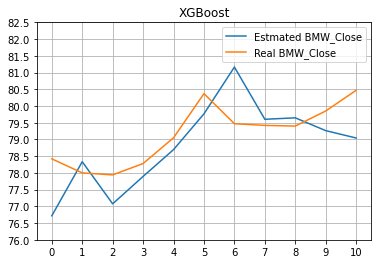

r2_socre: -0.2108463132201217
mse: 0.8855656865634955


In [85]:
# xgboost
xgb_model.fit(x,y)
y_15_xgb = xgb_model.predict(feature)

plt.plot(y_15_xgb, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('XGBoost')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_xgb, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_xgb))

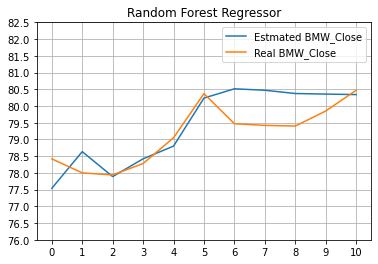

r2_socre: 0.4163575173361419
mse: 0.4268533093133206


In [79]:
# RF
rf_model.fit(x,y)
y_15_rf = rf_model.predict(feature)

plt.plot(y_15_rf, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Random Forest Regressor')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_rf, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_rf))

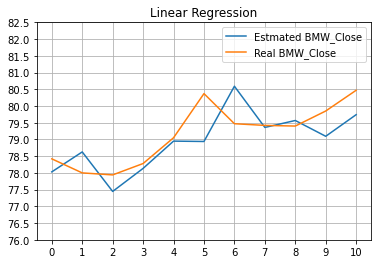

r2_socre: 0.34635249552041847
mse: 0.4780522472216889


In [80]:
# Linear Regression
LR.fit(x,y)
y_15_LR = LR.predict(feature)

plt.plot(y_15_LR, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_LR, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_LR))

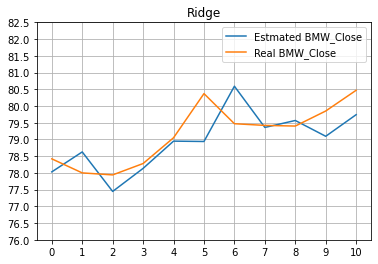

r2_socre: 0.3462151738824979
mse: 0.4781526789026028


In [81]:
# Ridge
Ridge_model.fit(x,y)
y_15_Ridge = Ridge_model.predict(feature)

plt.plot(y_15_Ridge, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Ridge')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_Ridge, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_Ridge))

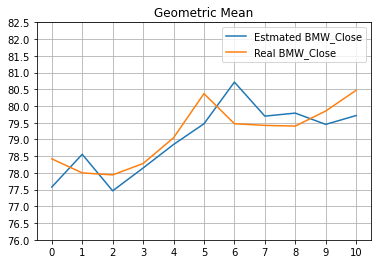

r2_socre: 0.425415936809171
mse: 0.42022833521691366


In [82]:
y_15_gmean = gmean([y_15_xgb, y_15_rf, y_15_LR, y_15_Ridge])

plt.plot(y_15_gmean, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Geometric Mean')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()
print('r2_socre:', r2_score(label, y_15_gmean, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_gmean))